In [ ]:
from functions import *

# Generation

The affective polarization algorithm is a network algorithm that modifies node attributes representing individual opinions. We begin, therefore, by generating a network. Specifically, we will be using the Erdős-Rényi model and the Barabási-Albert model. The latter provies us with a **scale-free random graph** to study the effects the scale-free property has on opinion dynamics, the former provides us a **uniform random graph** as a baseline for comparison.

If we wish to compare the influence that structure has on the behavior of our network, the two models should be otherwise similar. This includes the size (the number of edges) and order (the number of nodes), but in our case, it will also be important that both graphs will be connected. The polarization algorithm only applies to connected components. Therefore, disjoint subgraphs would essentially confuse the behavior of multiple small networks as a single large model. Measuring the dynamics of a a disconnected graph is as simple as aggregating the dynamics of its connected components. Therefore, our research will focus on connected graphs, and so it will be important during network generation to generate ER and BA networks that both connected.

The challenge, therefore, becomes, how do we generate both graphs such that they are same size, order and connectivity?

## The Erdős-Rényi Model

The Erdős-Rényi (ER) model was introduced by **Paul Erdös** and **Alfréd Rényi** in 1959. It provides a simple yet powerful framework for studying the properties of networks where edges form randomly between nodes. The ER model comes in two main variants: $G(n, m)$, where a graph is selected uniformly at random from the set of all graphs with $n$ nodes (i.e. order $n$) and exactly $m$ edges (i.e. size $m$), and $G(n, p)$, where each of the $\binom{n}{2}$ possible edges between $n$ nodes is included independently with probability $p$. The latter, $G(n, p)$, is perhaps the more commonly used formulation; however, because we need to maintain precise control of the size of our networks, we will be using the $G(n, m)$ model.

### Minimum Size

ER graphs are not always connected. The number of edges $m$ determines whether the graph is likely to be connected. Erdës and Rényi proved that, as the number of nodes $n$ increases towards infinity, the probability that the graph is connected undergoes a sharp transition at the **connectivity threshold**. Specifically,
$$
\lim_{n \to \infty} \mathbb{P}(G(n, m) \text{ is connected}) =
\begin{cases}
0 & \text{if } m < \displaystyle{\frac{n \ln n}{2}} \\
1 & \text{if } m > \displaystyle{\frac{n \ln n}{2}}
\end{cases}
$$
Therefore, our ER graphs will need to have *at least* $m=\displaystyle{\frac{n \ln n}{2}}$ number of edges in order to serve as a useful baseline for comparison with BA graphs. Remember that this is not a study of ER graphs generally. It is instead a baseline for comparison for the connected components of a BA graph of a given size and order. Therefore, a simple search for connected ER graphs of the same size and order will suffice. 

## The Barabási–Albert Model

The Barabási–Albert (BA) model was introduced by **Albert-László Barabási** and **Réka Albert** in 1999. Like the Erdős–Rényi model, BA networks are generated by specifying the number of nodes in the graph; however, unlike the ER model, which begins with $n$ isolated nodes and adds $m$ edges randomly, BA model begins with only $m$ nodes, and then grows the graph by adding $n-m$ additional nodes, each with $m$ new edges. Therefore, in the BA model, $m$ represents the number of new edges added per new node, rather than the total number of edges in the graph as in the ER model. The initial $m$ nodes are called the **seed** of teh BA graph. When a new node is added to the seed, the probability of attaching to an existing node is proportional to its degree. This process, called **preferential attachment**, produces a connected graph with a **power-law** (or "rich-get-richer") degree distribution:

$$p(k) \sim k^{-\gamma},\quad\mathbb{P}(2.5 \leq \gamma \leq 3) \approx 1$$

The scaling exponent $\gamma$ will be one of the most important measures for determining how network structure influences polarization.

The seed could be any graph on $m$ nodes. It is often a complete graph $K_m$. However, for this project, we use the NetworkX implementation of the BA model, which initializes the graph with $m$ *isolated* nodes. The first new node then adds $m$ edges, one for each of the isolated nodes, forming a connected graph on which preferential attachment can begin. If, for example, $m=3$ and $n>3$, then the initial graph will be 3 isolated nodes. Then the fourth node is added, the degree distribution will be $\{3, 1, 1, 1\}$, immediately giving us a degree distribution that appears to follow a power-law.

The total number of edges for a BA graph generated this way is $|E| = m(n-m)$, where $n$ is the number of nodes. The average degree is therefore

$$
\langle k \rangle = \frac{2|E|}{n} = 2m - \frac{2m^2}{n}.
$$

The average degree asymptotically approaches $2m$ as $n$ grows large:

$$
\lim_{n\to\infty} \left(2m - \frac{2m^2}{n}\right) = 2m.
$$

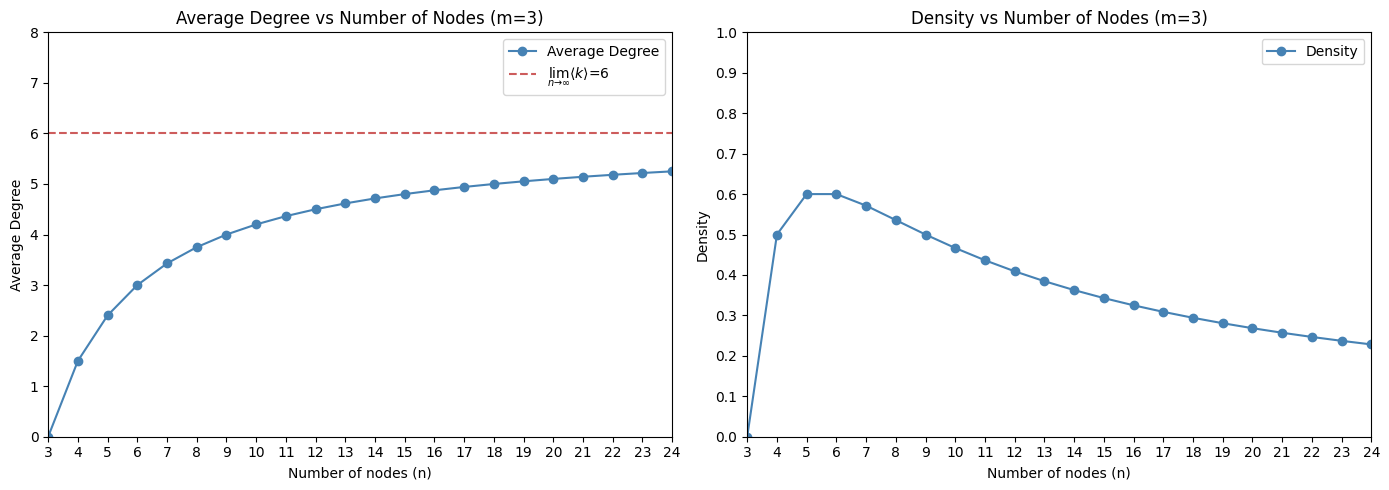

In [2]:
n_values = list(range(3, 25))  # n from 3 to 24 inclusive
m = 3

# Compute E(n), average degree, and density using isolated seed math
E_values = [m*(n - m) for n in n_values]
avg_degree = [2*m - (2*m**2)/n for n in n_values]
density = [2*E/(n*(n-1)) for E, n in zip(E_values, n_values)]

# Set up two side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(14,5))  # 1 row, 2 columns

# --- Left Plot: Average Degree ---
axes[0].plot(n_values, avg_degree, marker='o', color='steelblue', linestyle='-', label='Average Degree')
limit = 2 * m
axes[0].axhline(
    y=limit,
    color='indianred',
    linestyle='--',
    label=fr'$\lim_{{n\to\infty}} \langle k \rangle = {limit}$'
)

axes[0].set_xlim(3, 24)
axes[0].set_ylim(0, 8)
axes[0].set_xticks(range(3, 25))
axes[0].set_yticks(range(0, 9))
axes[0].set_xlabel('Number of nodes (n)')
axes[0].set_ylabel('Average Degree')
axes[0].set_title('Average Degree vs Number of Nodes (m=3)')
axes[0].legend()

# --- Right Plot: Density ---
axes[1].plot(n_values, density, marker='o', color='steelblue', linestyle='-', label='Density')

axes[1].set_xlim(3, 24)
axes[1].set_ylim(0, 1)
axes[1].set_xticks(range(3, 25))
axes[1].set_yticks([i/10 for i in range(0, 11)])
axes[1].set_xlabel('Number of nodes (n)')
axes[1].set_ylabel('Density')
axes[1].set_title('Density vs Number of Nodes (m=3)')
axes[1].legend()

# Layout and show
plt.tight_layout()
plt.show()

### Maximum Order

As $n$ increases relative to $m$, our BA graph becomes less dense, approaching zero. Therefore, it must eventually drop below the connectivity threshold for ER graphs. The question becomes: where do these two functions intersect for a given $m$?

$$m(n-m) \leq \frac{n \ln n}{2}$$

For this, let's begin by finding the points of intersection.

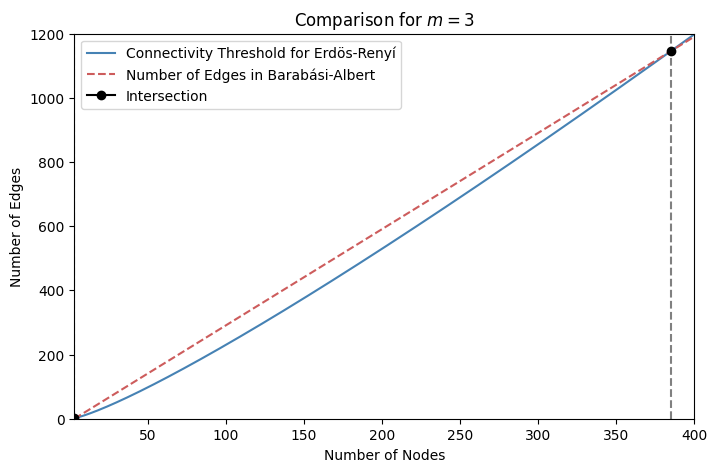

In [3]:
m = 3

# Range of n values
n_values = np.arange(m, 401)

# First curve: (n ln n)/2
y1 = (n_values * np.log(n_values)) / 2

# Second curve: m(n-m)
y2 = m * (n_values - m)

# Find approximate intersection points
diff = y1 - y2
sign_changes = np.where(np.diff(np.sign(diff)))[0]  # indices where sign changes

# Plot
plt.figure(figsize=(8,5))

# Plot the two curves
line1, = plt.plot(n_values, y1, color='steelblue', label='Connectivity Threshold for Erdös-Renyí')
line2, = plt.plot(n_values, y2, color='indianred', linestyle='--', label='Number of Edges in Barabási-Albert')

# Plot vertical dashed lines and dots at intersections
dots = []
for idx in sign_changes:
    n_cross = n_values[idx]
    y_cross = y1[idx]  # or y2[idx], approximately equal
    plt.axvline(x=n_cross, color='gray', linestyle='dashed')  # vertical line
    dot, = plt.plot(n_cross, y_cross, marker='o', color='black', markersize=6, label='Intersection')
    dots.append(dot)

# Axis settings
plt.xlabel('Number of Nodes')
plt.ylabel('Number of Edges')
plt.title(f'Comparison for $m={m}$')

# Set axis limits
plt.xlim(m, 400)
plt.ylim(0, 1200)

# Build legend carefully to avoid duplicate "Intersection" entries
handles = [line1, line2, dots[0]]  # only one intersection label
labels = [h.get_label() for h in handles]
plt.legend(handles, labels)

plt.show()

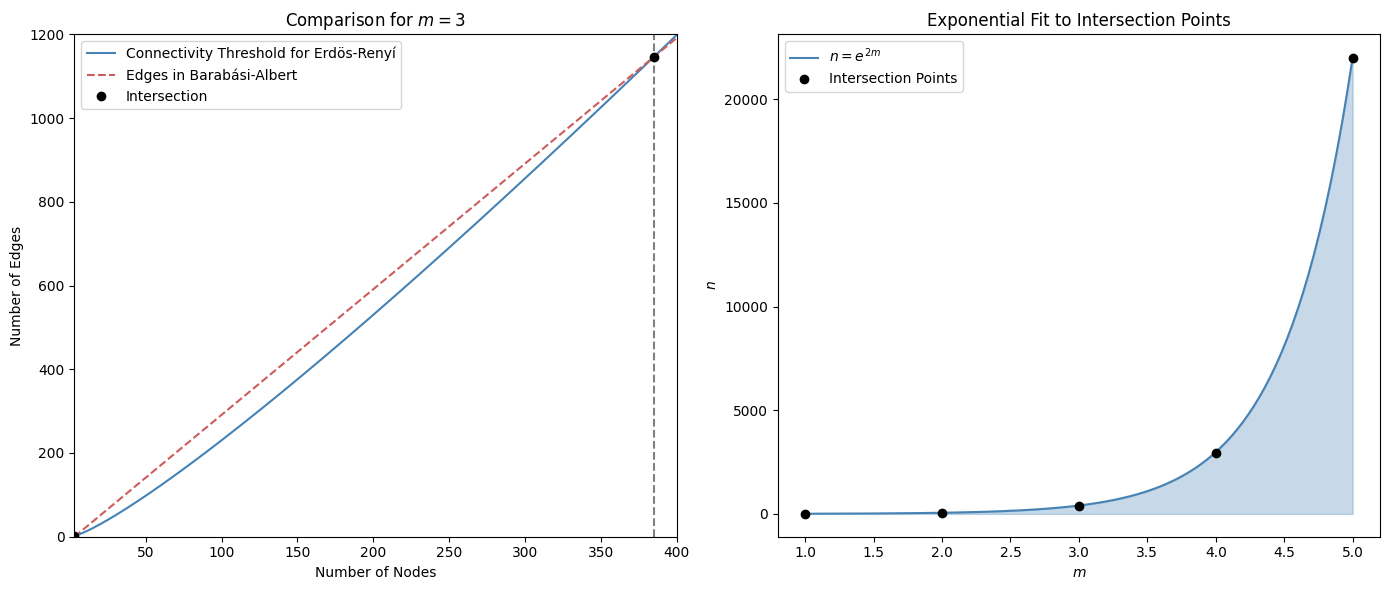

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# --- First Plot: Threshold vs BA Edges ---
def plot_threshold_vs_edges(ax, m=3):
    n_values = np.arange(m, 401)
    y1 = (n_values * np.log(n_values)) / 2
    y2 = m * (n_values - m)

    diff = y1 - y2
    sign_changes = np.where(np.diff(np.sign(diff)))[0]

    line1, = ax.plot(n_values, y1, color='steelblue', label='Connectivity Threshold for Erdös-Renyí')
    line2, = ax.plot(n_values, y2, color='indianred', linestyle='--', label='Edges in Barabási-Albert')

    dots = []
    for idx in sign_changes:
        n_cross = n_values[idx]
        y_cross = y1[idx]
        ax.axvline(x=n_cross, color='gray', linestyle='dashed')
        dot, = ax.plot(n_cross, y_cross, 'o', color='black', markersize=6, label='Intersection')
        dots.append(dot)

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Number of Edges')
    ax.set_title(f'Comparison for $m={m}$')
    ax.set_xlim(m, 400)
    ax.set_ylim(0, 1200)

    handles = [line1, line2, dots[0]]
    labels = [h.get_label() for h in handles]
    ax.legend(handles, labels)


# --- Second Plot: Exponential Fit to Intersections ---
def plot_exponential_fit(ax):
    m_points = np.array([1, 2, 3, 4, 5])
    n2_points = np.array([4.92155, 45.8579, 385.001, 2948.78, 21976.4])
    m_curve = np.linspace(1, 5, 200)
    n_curve = np.exp(2 * m_curve)

    ax.plot(m_curve, n_curve, '-', label=r'$n = e^{2m}$', color='steelblue')
    ax.plot(m_points, n2_points, 'o', label='Intersection Points', color='black')
    ax.fill_between(m_curve, n_curve, color='steelblue', alpha=0.3)

    ax.set_xlabel('$m$')
    ax.set_ylabel('$n$')
    ax.set_title('Exponential Fit to Intersection Points')
    ax.legend()


# --- Combine both plots ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
plot_threshold_vs_edges(ax1)
plot_exponential_fit(ax2)
plt.tight_layout()
plt.show()


Note that the functions intersect at two points; however, our graphs will be significantly larger than the minimum threshold, so we will focus on the larger of the two numbers.

| $m$ | $n_1$ | $n_2$ |
|:---|:-----|:-----|
| 1 | 1.00000 | 4.92155 |
| 2 | 2.64141 | 45.8579 |
| 3 | 3.87469 | 385.001 |
| 4 | 5.00876 | 2948.78 |
| 5 | 6.10425 | 21976.4 |

Curve fitting the larger points of intersection strongly suggests that the maximum order of a BA graph that will have a sufficient number of edges for an ER graph of the same size and order to be connected follows closely (but not exactly) to a simple exponential function.
$$n\leq e^{2m}$$

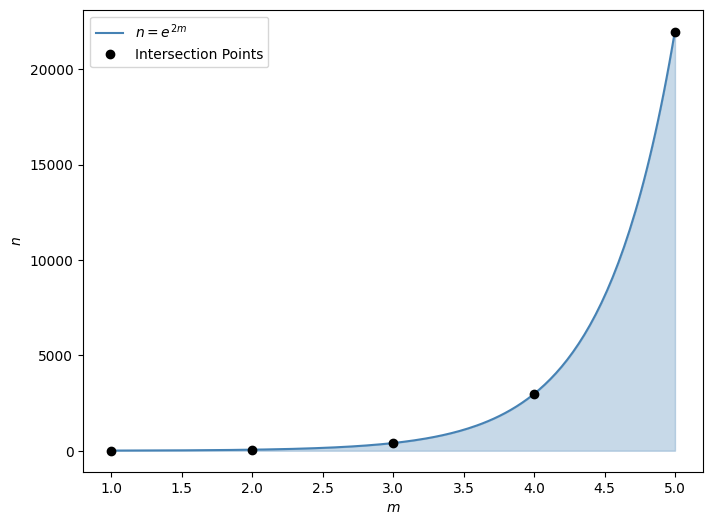

In [5]:
# Given m values and corresponding n2 values
m_points = np.array([1, 2, 3, 4, 5])
n2_points = np.array([4.92155, 45.8579, 385.001, 2948.78, 21976.4])

# Define a smooth m-range for plotting the clean curve
m_curve = np.linspace(1, 5, 200)
n_clean_curve = np.exp(2 * m_curve)  # n = e^(2m)

# Create the plot
plt.figure(figsize=(8, 6))

# Plot n = e^(2m) curve
plt.plot(m_curve, n_clean_curve, '-', label=r'$n = e^{2m}$', color='steelblue')

# Plot points (discrete)
plt.plot(m_points, n2_points, 'o', label='Intersection Points', color='black')

# Shade under the curve
plt.fill_between(m_curve, n_clean_curve, color='steelblue', alpha=0.3)

# Axis labels and title
plt.xlabel('$m$')
plt.ylabel('$n$')
plt.legend()
plt.show()

## Scale-Free Networks

So far, we know that the order $n$ of our network should satisfy $m \leq n \leq e^{2m}$. This allows us to easily find connected Erdös-Renyí graphs of the same size and order of a given Barabási-Albert graph. However, the focus of this research is to study how structural properties (specifically, the scale-free property) of networks influence opinion dynamics.

A graph is said to have the scale-free property when its structure looks statistically similar at different scales of observation. In such graphs, a small number of nodes have very high degrees, acting as hubs, while the vast majority of nodes have relatively few connections. This uneven distribution of connections remains consistent even if one examines only a subset of the graph or zooms out to view the entire network.

The scale-free property is closely associated with degree distributions that follow a power law. Formally, a graph is said to exhibit a power-law degree distribution if the probability $P(k)$ that a randomly chosen node has degree $k$ satisfies $P(k) \sim k^{-\gamma}$ for some constant exponent $\gamma > 1$. This relationship implies that while most nodes have small degrees, a few nodes have very large degrees, and the probability of encountering a node of degree $k$ decays polynomially rather than exponentially. The scale-free property thus reflects the invariance of the degree distribution under rescaling, with the functional form $k^{-\gamma}$ preserved across different levels of observation.

The Barabási–Albert model is commonly used to study scale-free networks because it generates graphs whose degree distributions approximate a power law. As the network grows according to its attachment mechanism, the resulting structure exhibits the key feature of scale-free graphs: a small number of highly connected nodes alongside many nodes with few connections. The Barabási–Albert model thus provides a simple generative framework that reproduces the characteristic statistical self-similarity of scale-free degree distributions observed in many real-world networks.

While the Barabási–Albert model provides a convenient way to generate scale-free networks, our interest is not in the model itself, but in the structural properties of the networks it produces. We use the BA model as a tool to generate graphs that approximate real-world systems, particularly those exhibiting scale-free degree distributions. In particular, we focus on graphs where the degree distribution exponent $\gamma$ falls between 2.3 and 3.0, consistent with the range observed in many empirical studies of social networks. When $n$ is sufficiently large, the mean value of the power-law exponent $\gamma$ for Barabási–Albert graphs approaches 3. However, our $n$ is bounded above by $e^{2m}$ and may be significantly less than that. Therefore, it is important to determine what $\gamma$ values BA graphs will have within the range of $n$ that we will be working with.

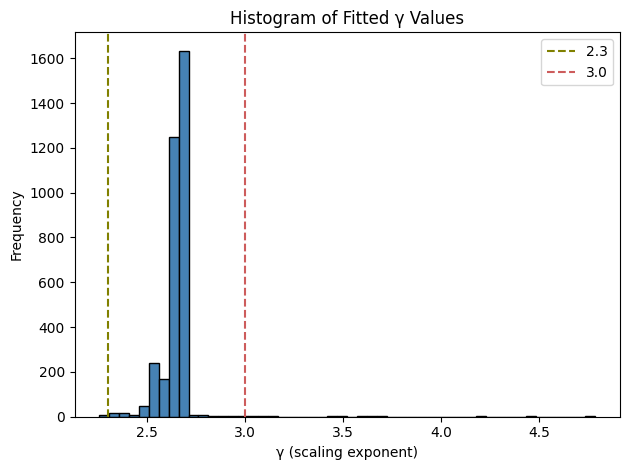

Percentage of gamma values between 2.3 and 3.0: 99.47% (3404/3422)


In [6]:
'''
HOW TO USE gamma_histogram()

----------------------------------------------------------
m parameter:
- m=None → use all m values.
- m=int → filter to that m (required for generate=True).

n parameter:
- n=None → use all n values.
- n=int → filter n = value.
- n=('<', value) or n=('<=', value) → filter n < or <= value.

generate parameter:
- generate=False → only read database.
- generate=True → generate new data if m=int (n limits n-values).

Examples:
- gamma_histogram() → all data.
- gamma_histogram(m=3) → m=3 only.
- gamma_histogram(n=('<',100)) → n<100 only.
- gamma_histogram(m=3, n=('<=',50)) → m=3 and n<=50.
- gamma_histogram(m=4, generate=True) → generate all valid n for m=4.

Important:
- m must be int to generate.
- n filters restrict which n are used.
- Only '=', '<', '<=' allowed.
'''

gamma_histogram()

So, now that we know the range of values for which it is possible for ER and BA graphs to be of the same size and order and also that the vast majority of ER graphs will be connected while the vast majority of BA graphs (which are always connected) will have $2.3\leq\gamma\leq 3.0$; we can easily generate such graphs.

Our `generate_networks` function takes the number of nodes $n$, calculates the smallest value of $m$ that will generate a number of edges in a BA above teh connectivity threshold for an ER graph, then generate those graphs, keeping only those that are connected (in the case of ER) with a $\gamma$ between 2.3 and 3.0 (in the case of BA). Alternatively, an $m$ can be specified and the boundaries for $\gamma$ can be adjusted.

Returned size:     76
Actual size of ER: 76
Actual size of BA: 76
γ estimate of BA: 2.33


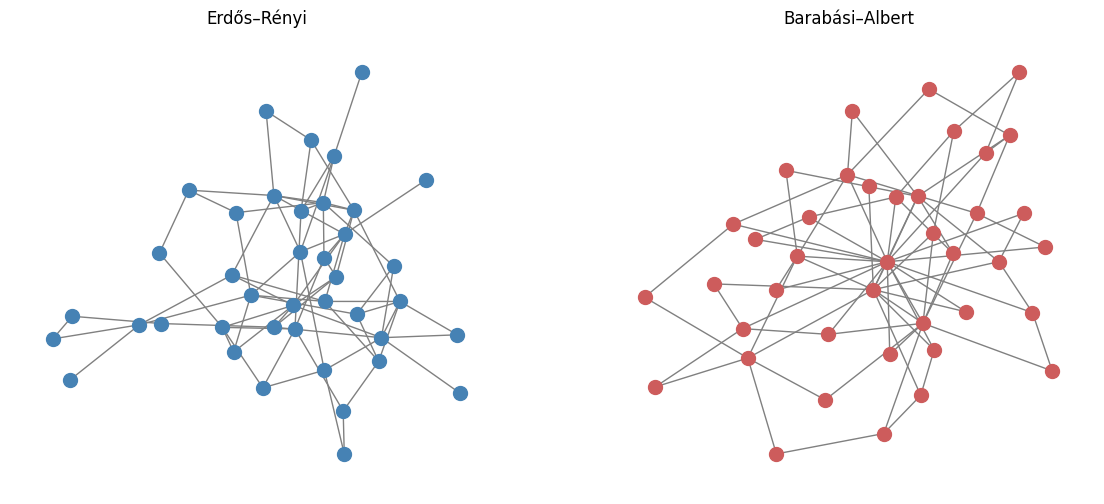

In [7]:
# Generate networks
n = 40
m = None
ER, BA = generate_networks(n, m)

# Calculate what the number of edges should be
if m == None:
    m = 1
    while True:
        size = m * (n - m)
        if m + 1 <= n <= np.exp(2 * m):
            break
        m += 1
size = m * (n - m)

# Estimate gamma
gamma = estimate_gamma(BA, m)

# Print graph properties
print(f"Returned size:     {size}")
print(f"Actual size of ER: {ER.number_of_edges()}")
print(f"Actual size of BA: {BA.number_of_edges()}")
print(f"γ estimate of BA: {gamma:.2f}")

# Create figure and two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Plot first graph
plt.sca(ax1)
nx.draw(ER, node_color='steelblue', edge_color='gray', node_size=100)
ax1.set_title('Erdős–Rényi')

# Plot second graph
plt.sca(ax2)
nx.draw(BA, node_color='indianred', edge_color='gray', node_size=100)
ax2.set_title('Barabási–Albert')

plt.show()

A power-law distribution appears linear when plotted on logarithmic scales for both the x-axis and y-axis.

$$P(k) \sim k^{-\gamma} \longrightarrow \log P(k) \sim -\gamma \log k$$

As a result, the data points form a straight line on a log-log plot, with a slope equal to $-\gamma$, making it easy to visually identify power-law behavior. In the case of Barabási–Albert graphs, this implies that their degree distributions, when plotted on log-log axes, should display an approximately straight line, confirming the presence of scale-free structure.

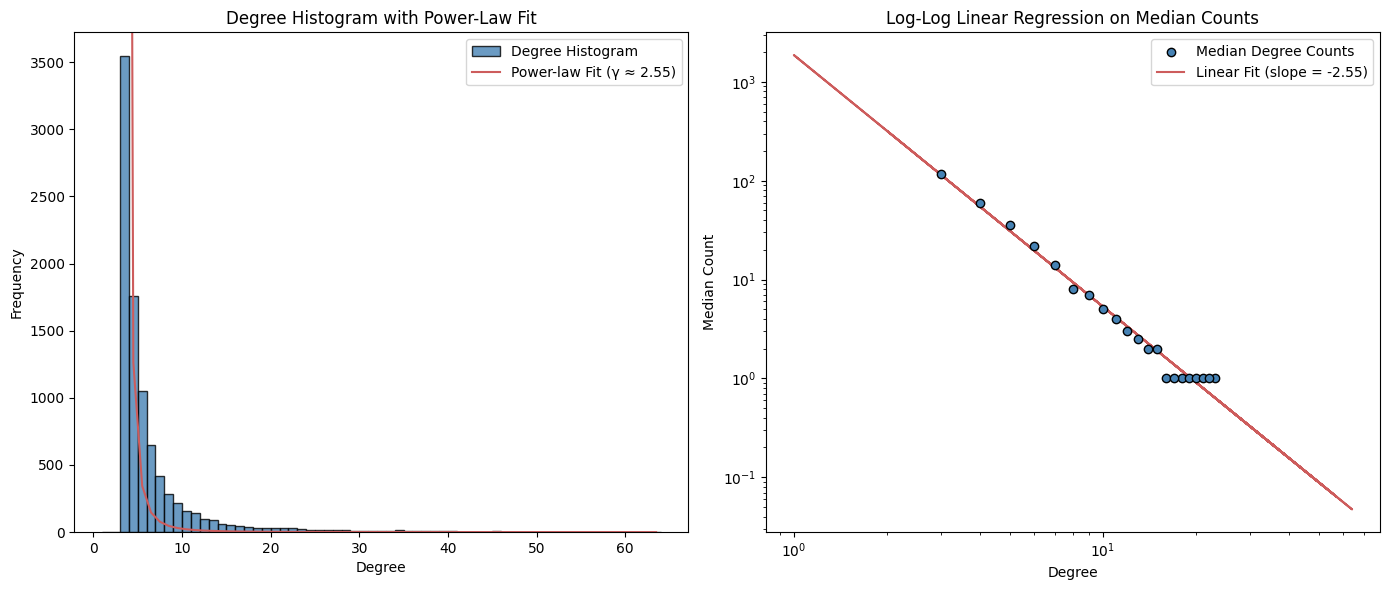

In [8]:
# Parameters
n = 300      # Number of nodes
k = 30       # Number of graphs to generate
m = 3        # Set manually

# --- Collect data ---
degree_counts_list = []  # list of pandas Series for each graph
all_degrees = []         # flattened degrees across all graphs
gamma_list = []          # list of gamma estimates

for _ in range(k):
    _, G = generate_networks(n, m)
    
    degrees = np.array([deg for _, deg in G.degree()])
    degree_counts = pd.Series(degrees).value_counts().sort_index()
    degree_counts_list.append(degree_counts)

    all_degrees.extend(degrees.tolist())

    # Estimate gamma directly from the graph
    gamma_estimate = estimate_gamma(G, m)
    gamma_list.append(gamma_estimate)

# --- Aggregate median counts ---
degree_counts_df = pd.concat(degree_counts_list, axis=1).fillna(0)
median_counts = degree_counts_df.median(axis=1)

# --- Log-log linear regression on median counts ---
degrees = median_counts.index.values
counts = median_counts.values

mask = counts > 0  # Only use degrees with positive count
log_degrees = np.log10(degrees[mask])
log_counts = np.log10(counts[mask])

slope, intercept, r_value, p_value, std_err = linregress(log_degrees, log_counts)

# --- Final overall gamma estimate (average of all graph gammas) ---
overall_gamma = np.mean(gamma_list)

# --- Prepare data for plotting ---
all_degrees = np.array(all_degrees)

# --- Plotting ---

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First plot: Degree histogram (fixed bins of width 1)
bins = np.arange(min(all_degrees), max(all_degrees) + 1, 1)
hist_vals, bin_edges, _ = axes[0].hist(all_degrees, bins=bins, edgecolor="black", color='steelblue', alpha = 0.8, label='Degree Histogram')

# Lock y-axis limit based on histogram
ymin, ymax = axes[0].get_ylim()

# Compute bin centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

# Overlay shifted power-law fit line, with gamma label
x_fit = bin_centers
valid_mask = (x_fit - m) > 0
x_fit_valid = x_fit[valid_mask]
y_fit = ((x_fit_valid - m) ** (-overall_gamma)) * np.max(hist_vals)

axes[0].plot(x_fit_valid, y_fit, color='indianred', linestyle='-', label=f'Power-law Fit (γ ≈ {overall_gamma:.2f})')

# Restore original y-limits
axes[0].set_ylim(ymin, ymax)

axes[0].set_xlabel('Degree')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Degree Histogram with Power-Law Fit')
axes[0].legend()

# Second plot: Linear regression fit and scatter
axes[1].scatter(degrees, counts, edgecolor="black",color='steelblue', label='Median Degree Counts', zorder=2)
axes[1].plot(degrees, 10**(intercept + slope * np.log10(degrees)), color='indianred', linestyle='-', label=f'Linear Fit (slope = {slope:.2f})', zorder=1)
axes[1].set_xscale('log')
axes[1].set_yscale('log')
axes[1].set_xlabel('Degree')
axes[1].set_ylabel('Median Count')
axes[1].set_title('Log-Log Linear Regression on Median Counts')
axes[1].legend()

plt.tight_layout()
plt.show()

# Affiliation

Now that we have our graphs, we need to provide our nodes with group identity. Affective polarization is dependent on in-group and out-group identities, so we need *at least* two subgraphs. Regardless of how many subgraphs are identified, their union should be the entire set of nodes (i.e. all nodes belong to a group) and their intersection should be the empty set (i.e. no nodes belong to more than one group). The question remains, how should we allocate nodes to subgraphs?

Real-world social networks have community structures. These structures have recognizable intergroup and intragroup patterns of connection. Specifically, intragroup connections tend to be dense, which we call clustering, and intergroup connections tend to be sparse, which we call modularity. While in the real-world we often begin with group identity and then measure its clustering and modularity coefficients, we can also discover communities within a population by partitioning the population in ways that either maximize intragroup connections or minimizing intergroup connections.

The network generator most directly related to community detection is the stochastic block model, making it an excellent choice for studying affective polarization. However, our research is primarily focused on *other* network structures, namely the scale-free property. Nevertheless, if we wish to distinguished between the influence of the scale-free property and the influence of community structures, there will need to be community structures within our scale-free network. We accomplished this in the way nodes are assigned to subgraphs.

We use both spectral partitioning, maximizing intergroup connections by sorting nodes according to their Fiedler vector and partitioning the set. The Fiedler vector is associated with the second-smallest eigenvalue on the Laplacian matrix, $L = D - A$, where $A$ is the adjacency matrix and $D$ is the diagonalmatrix of node degrees. We also use modularity maximization, which is also a spectral method using the leading eigenvector of the modularity matrix

$$B_{ij} = A_{ij} - \frac{k_i k_j}{2m}$$

where $k_i$ is the degree of node $i$ and $m$ is the number of edges in $G$. These two method are compared both to each other as well as to a random subgraph assignment as a baseline of comparison. In each case, the sizes of the partitions are maintained, and only random assignment is not deterministic. You can see the visual differences below for each type of graph (ER or BA) and each method of partitioning (random, spectral, modular).

In [9]:
import pandas as pd
from IPython.display import display

def graph_summary_table(graph, subgraphs, m):
    """
    Prints a table summarizing the graph and its subgraphs.

    Parameters
    ----------
    graph : networkx.Graph
        The full graph.
    subgraphs : list of networkx.Graph
        List of subgraphs.
    m : int
        The minimum degree used for gamma estimation.
    """
    rows = []

    # --- Precompute modularity of the partition ---
    partition = [list(sg.nodes()) for sg in subgraphs]
    modularity_val = nx.algorithms.community.modularity(graph, partition)

    # Full graph summary
    rows.append({
        "Graph": "Full Graph",
        "Order": graph.number_of_nodes(),
        "Size": graph.number_of_edges(),
        "Connected": nx.is_connected(graph),
        "Gamma": f"{estimate_gamma(graph, m):.2f}",
        "Clustering": f"{nx.average_clustering(graph):.2f}",
        "Modularity": f"{modularity_val:.2f}",
    })

    # Subgraphs summaries
    for i, sg in enumerate(subgraphs):
        rows.append({
            "Graph": f"Subgraph {i+1}",
            "Order": sg.number_of_nodes(),
            "Size": sg.number_of_edges(),
            "Connected": nx.is_connected(sg),
            "Gamma": f"{estimate_gamma(sg, m):.2f}",
            "Clustering": f"{nx.average_clustering(sg):.2f}",
            "Modularity": "N/A"  # Subgraph modularity not meaningful
        })

    # Create and display the DataFrame
    df = pd.DataFrame(rows)
    display(df.style.set_table_styles([
        {"selector": "th", "props": [("text-align", "center")]},
        {"selector": "td", "props": [("text-align", "center")]},
    ]).set_properties(**{'text-align': 'center'}))


------------------------  Groups assigned by random shuffling  ------------------------

Erdös-Renyí graph with random subgraphs


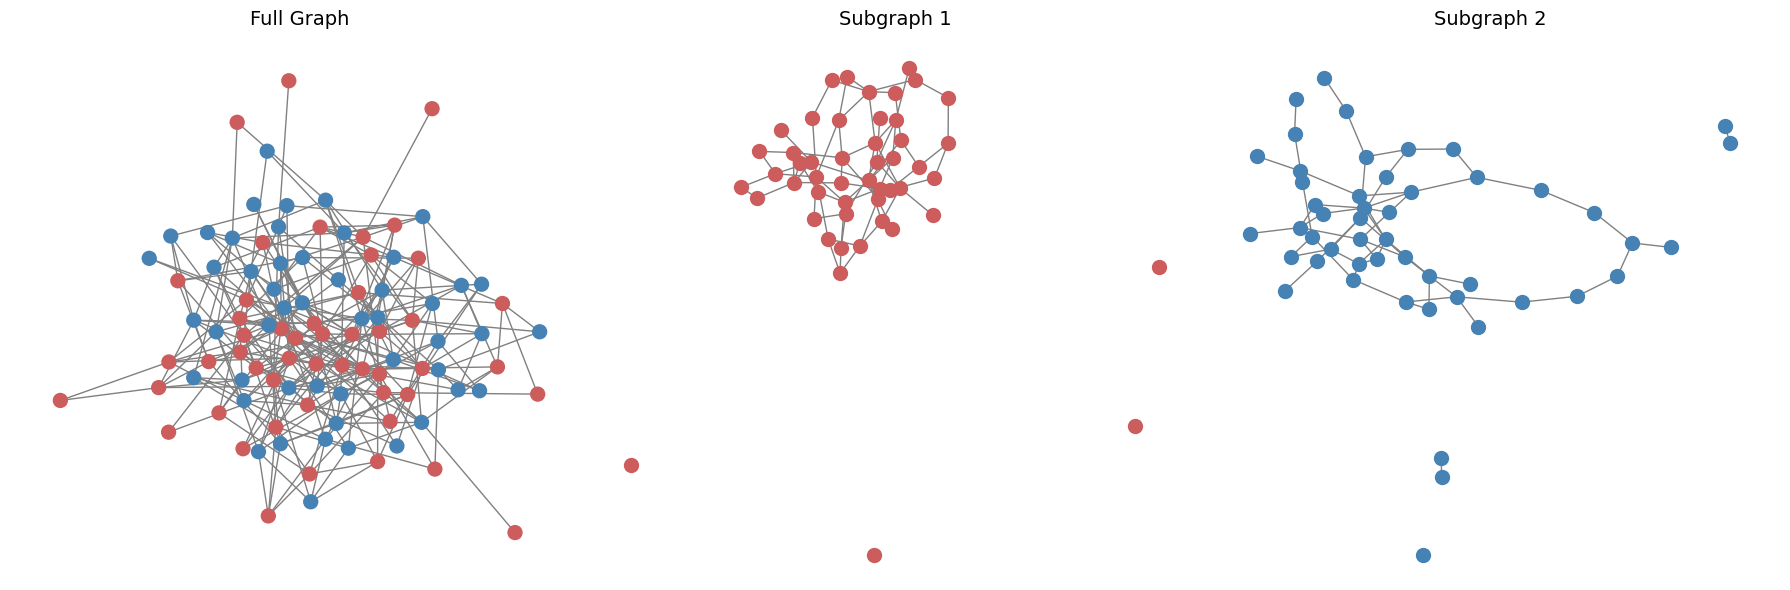


Barabási-Albert graph with random subgraphs


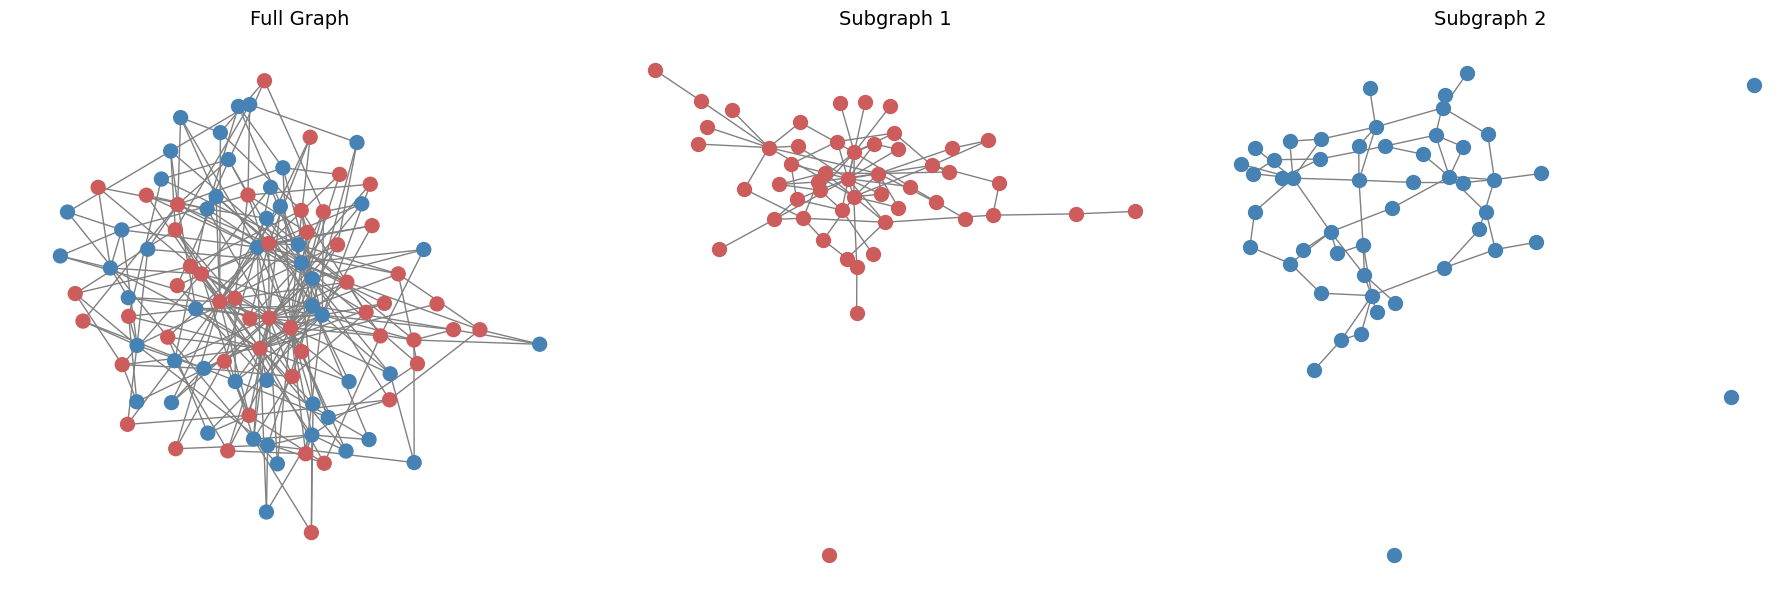


------------------------  Groups assigned by spectral partitioning  ------------------------

Erdös-Renyí graph with spectral subgraphs


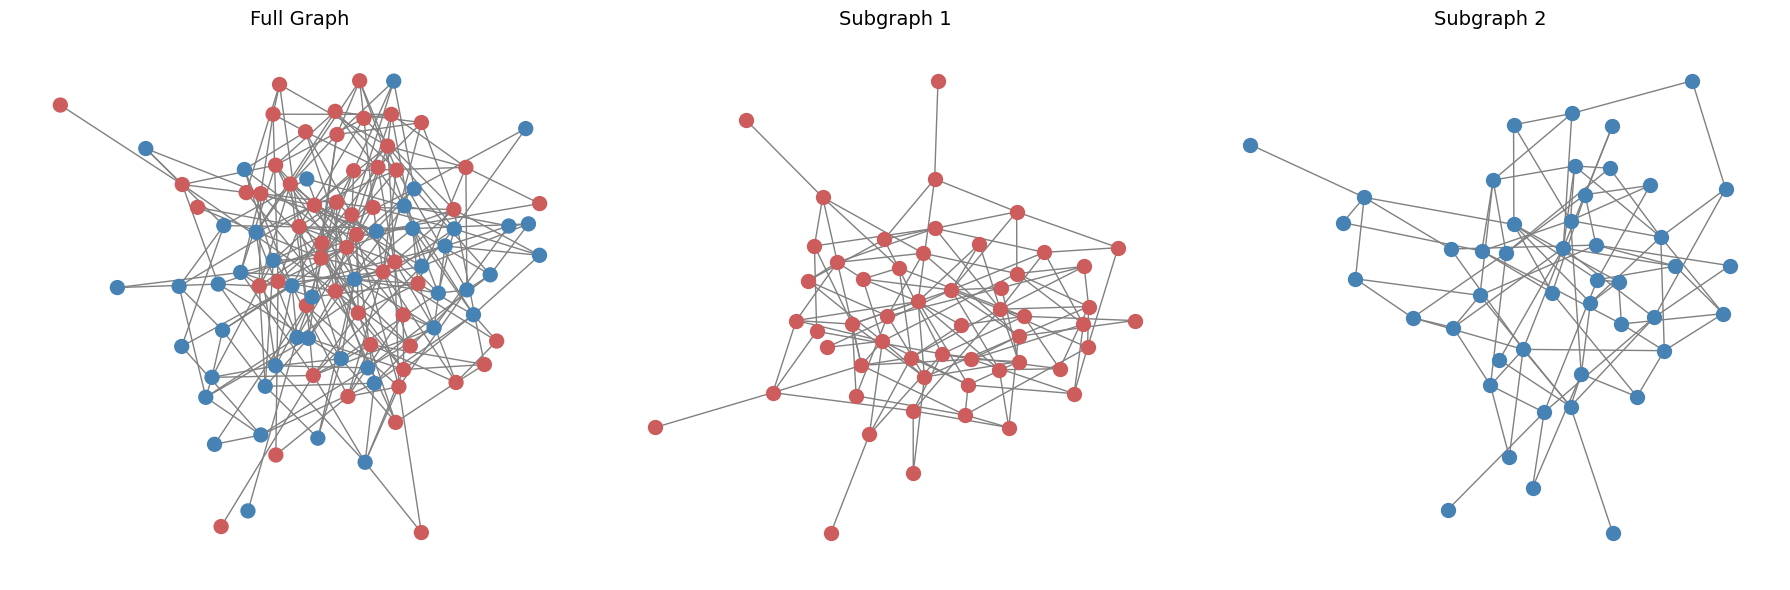


Barabási-Albert graph with spectral subgraphs


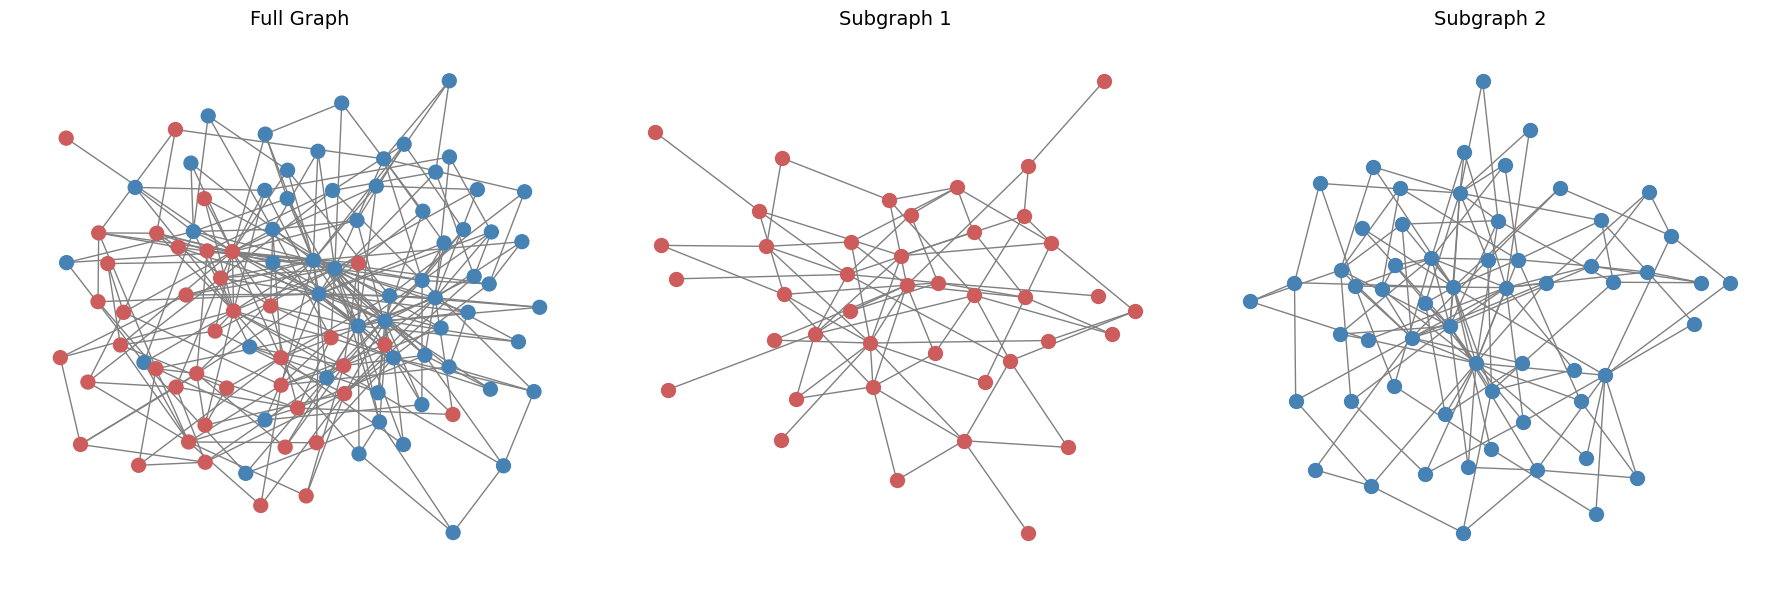


------------------------  Groups assigned by modularity partitioning  ------------------------

Erdös-Renyí graph with modular subgraphs


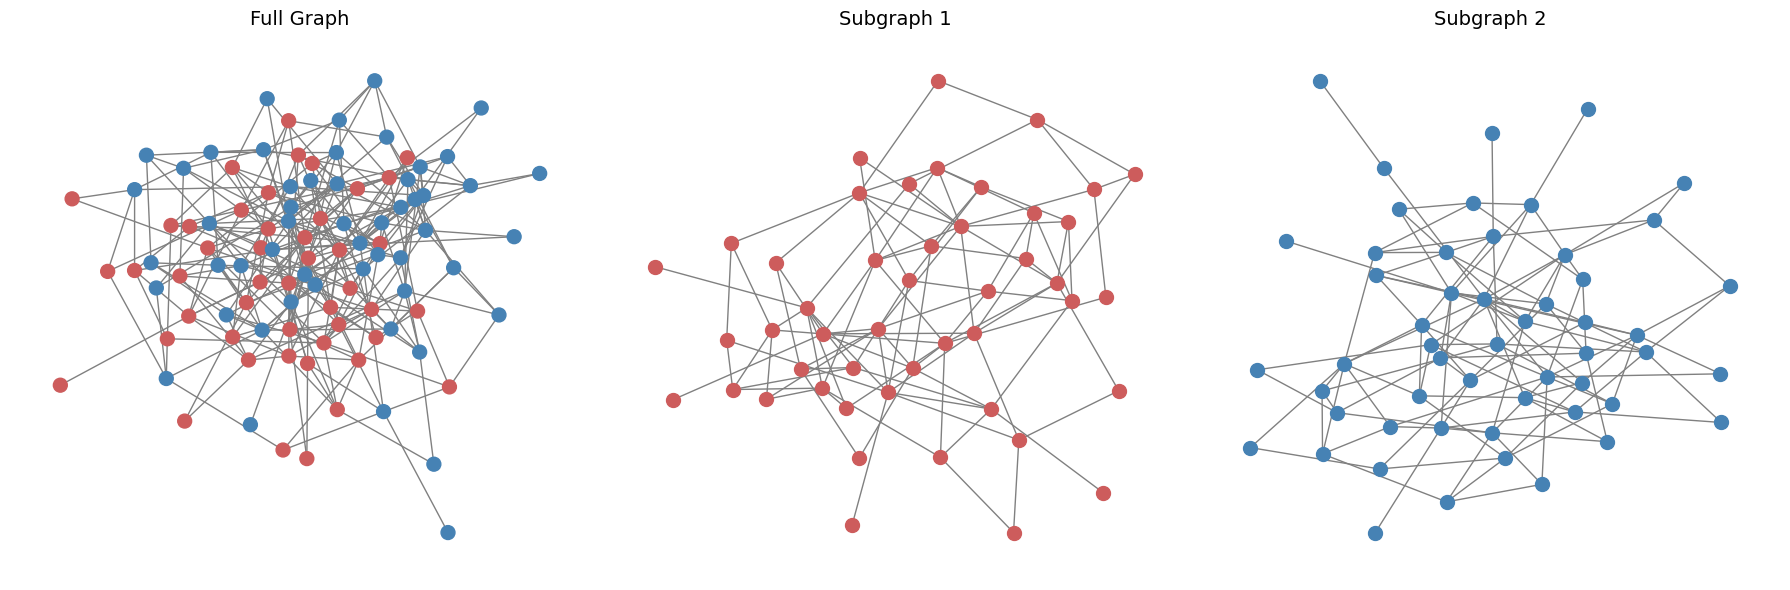


Barabási-Albert graph with modular subgraphs


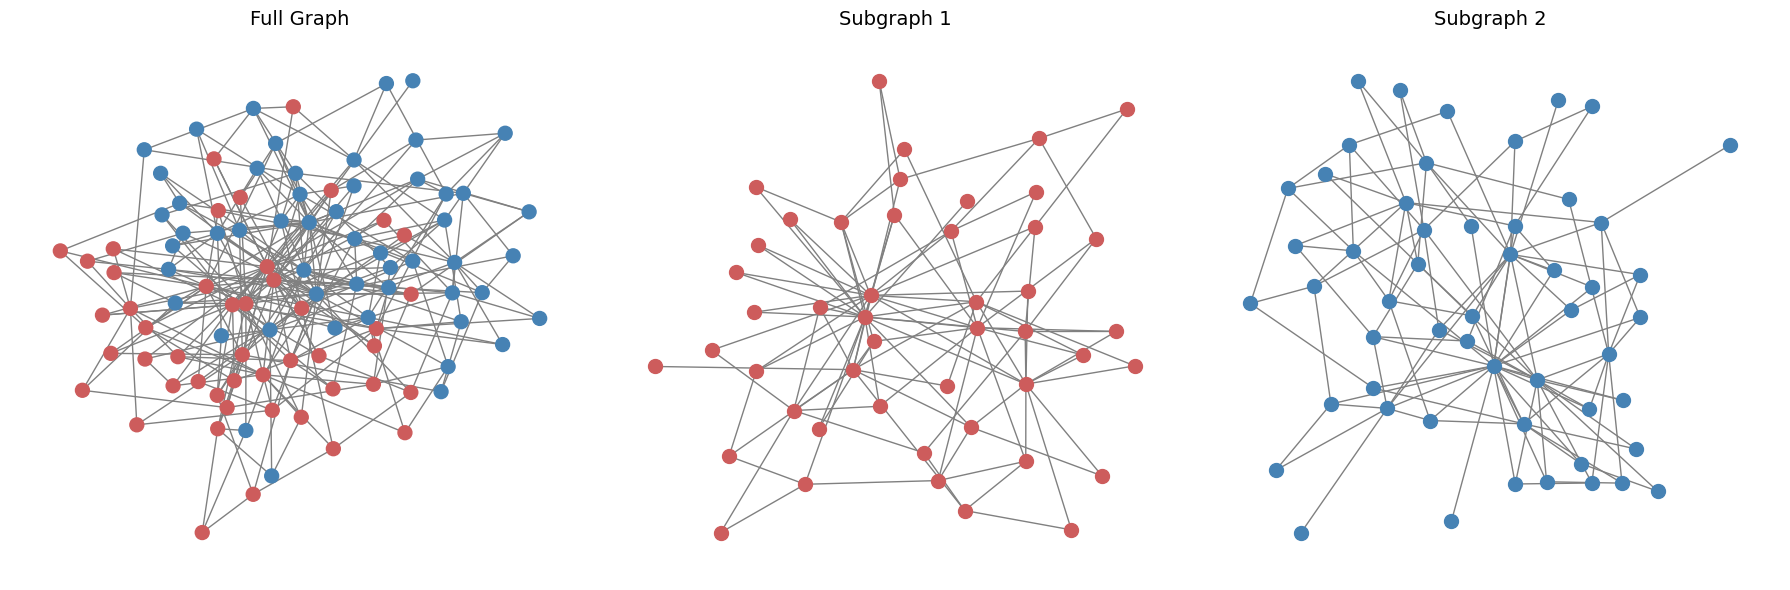

In [10]:
# Set parameters
n = 100
m = 3
ratios = [1, 1]

# Generate graphs
ER, BA = generate_networks(n, m)

# RANDOM AFFILIATION
print()
print("-" * 24, " Groups assigned by random shuffling ", "-" * 24)
print()

# --- ER Random Subgraphs ---
subgraphs = random_subgraphs(ER, ratios)
print('Erdös-Renyí graph with random subgraphs')
subgraph_plot(ER, subgraphs)
graph_summary_table(ER, subgraphs, m)

# --- BA Random Subgraphs ---
subgraphs = random_subgraphs(BA, ratios)
print('\nBarabási-Albert graph with random subgraphs')
subgraph_plot(BA, subgraphs)
graph_summary_table(BA, subgraphs, m)

# SPECTRAL PARTITIONING
print()
print("-" * 24, " Groups assigned by spectral partitioning ", "-" * 24)
print()

# --- ER Spectral Subgraphs ---
subgraphs = spectral_subgraphs(ER)
print('Erdös-Renyí graph with spectral subgraphs')
subgraph_plot(ER, subgraphs)
graph_summary_table(ER, subgraphs, m)

# --- BA Spectral Subgraphs ---
subgraphs = spectral_subgraphs(BA)
print('\nBarabási-Albert graph with spectral subgraphs')
subgraph_plot(BA, subgraphs)
graph_summary_table(BA, subgraphs, m)

# MODULARITY PARTITIONING
print()
print("-" * 24, " Groups assigned by modularity partitioning ", "-" * 24)
print()

# --- ER Modularity Subgraphs ---
subgraphs = modular_subgraphs(ER)
print('Erdös-Renyí graph with modular subgraphs')
subgraph_plot(ER, subgraphs)
graph_summary_table(ER, subgraphs, m)

# --- BA Modularity Subgraphs ---
subgraphs = modular_subgraphs(BA)
print('\nBarabási-Albert graph with modular subgraphs')
subgraph_plot(BA, subgraphs)
graph_summary_table(BA, subgraphs, m)

Given that real-world networks tend to have a high level of clustering and modularity simultaneously yet our networks have been generated to model community structure only as a secondary property, it is natural to ask to what extent our two deterministic methods of partition produce similar partitions.

In [11]:
import numpy as np
import networkx as nx
from scipy.stats import chi2_contingency

def label_from_partition(subgraphs, n_nodes):
    labels = np.empty(n_nodes, dtype=int)
    for i, sg in enumerate(subgraphs):
        for node in sg.nodes:
            labels[node] = i
    return labels

def binary_contingency_table(labels1, labels2):
    a = np.sum((labels1 == 0) & (labels2 == 0))
    b = np.sum((labels1 == 0) & (labels2 == 1))
    c = np.sum((labels1 == 1) & (labels2 == 0))
    d = np.sum((labels1 == 1) & (labels2 == 1))
    return a, b, c, d

def phi_coefficient(a, b, c, d):
    numerator = a * d - b * c
    denominator = np.sqrt((a + b) * (a + c) * (b + d) * (c + d))
    return 0.0 if denominator == 0 else numerator / denominator

# Parameters
n = 400
k_trials = 10

phi_scores_ER = []
pvals_ER = []
phi_scores_BA = []
pvals_BA = []

for trial in range(1, k_trials + 1):
    ER, BA = generate_networks(n)

    spec_ER = spectral_subgraphs(ER)
    mod_ER = modular_subgraphs(ER)
    spec_BA = spectral_subgraphs(BA)
    mod_BA = modular_subgraphs(BA)

    spec_ER_labels = label_from_partition(spec_ER, n)
    mod_ER_labels = label_from_partition(mod_ER, n)
    spec_BA_labels = label_from_partition(spec_BA, n)
    mod_BA_labels = label_from_partition(mod_BA, n)

    a, b, c, d = binary_contingency_table(spec_ER_labels, mod_ER_labels)
    table_ER = np.array([[a, b], [c, d]])
    phi_ER = phi_coefficient(a, b, c, d)
    chi2_ER, p_ER, _, _ = chi2_contingency(table_ER)

    a, b, c, d = binary_contingency_table(spec_BA_labels, mod_BA_labels)
    table_BA = np.array([[a, b], [c, d]])
    phi_BA = phi_coefficient(a, b, c, d)
    chi2_BA, p_BA, _, _ = chi2_contingency(table_BA)

    phi_scores_ER.append(phi_ER)
    pvals_ER.append(p_ER)
    phi_scores_BA.append(phi_BA)
    pvals_BA.append(p_BA)

# --- Mean results ---
print("\n" + "="*20 + " Mean Results Over All Trials " + "="*20)
print("\nER Graphs:")
print("  Mean Phi Coefficient :", round(np.mean(phi_scores_ER), 4))
print("  Mean Chi² p-value    :", round(np.mean(pvals_ER), 4))

print("\nBA Graphs:")
print("  Mean Phi Coefficient :", round(np.mean(phi_scores_BA), 4))
print("  Mean Chi² p-value    :", round(np.mean(pvals_BA), 4))



==================== Mean Results Over All Trials ====================

ER Graphs:
  Mean Phi Coefficient : -0.0079
  Mean Chi² p-value    : 0.0208

BA Graphs:
  Mean Phi Coefficient : -0.0069
  Mean Chi² p-value    : 0.158


There does not appear to be any relationship between clustering and modularity, the two methods producing neglibible correlations of subgraph assignments. That is dissimilar to real-world networks; however, it does give us the opportunity to separately study the influence of clustering and modularity on affective polarization.

# Attribution

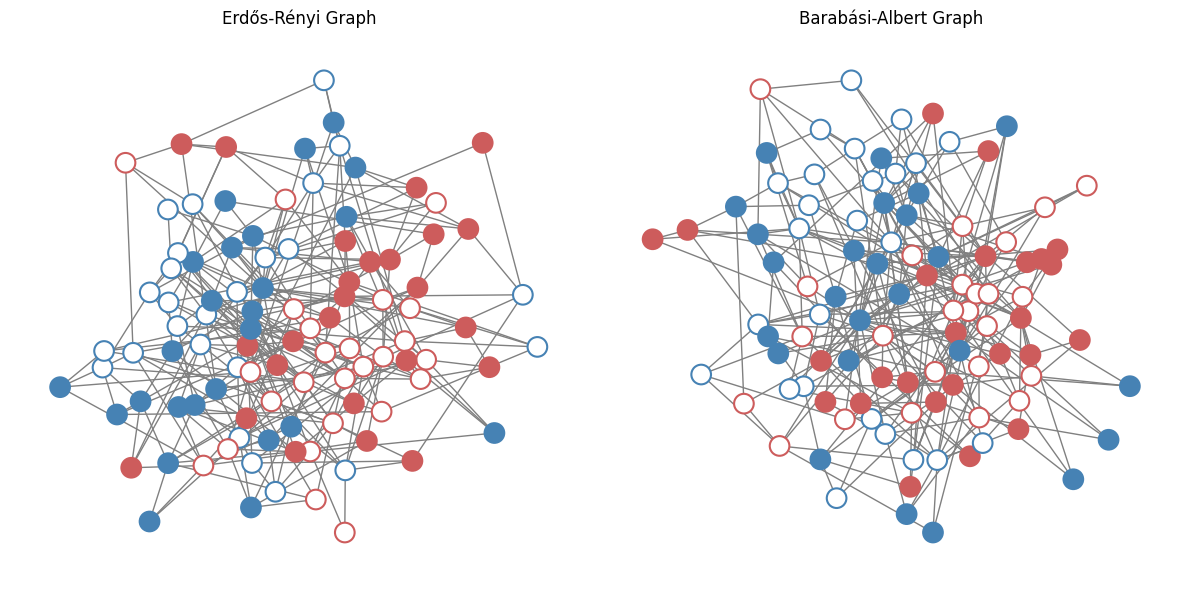

In [12]:
# ---- Graph Generation ----

n = 100
ratios = [1, 1]
opinion_ratios = [0.5, 0.5]

ER, BA = generate_networks(n)
ER_subs = random_subgraphs(ER, ratios)
random_opinions(ER, ER_subs, opinion_ratios)
BA_subs = random_subgraphs(BA, ratios)
random_opinions(BA, BA_subs, opinion_ratios)

# ---- Visualization ----

# Generate subgraph-based color palette
subgraph_colors = generate_colors(len(ER_subs))

# Create node → subgraph index lookup
ER_subgraph_map = {node: i for i, sg in enumerate(ER_subs) for node in sg.nodes()}
BA_subgraph_map = {node: i for i, sg in enumerate(BA_subs) for node in sg.nodes()}

# Create node → opinion value lookup
ER_opinion_map = {node: ER.nodes[node]["opinion"] for node in ER.nodes()}
BA_opinion_map = {node: BA.nodes[node]["opinion"] for node in BA.nodes()}

# Determine fill color (white if opinion=0) and outline color (always by subgraph)
node_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] if ER.nodes[n]["opinion"] == 1 else "white"
    for n in ER.nodes()
]
edge_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] for n in ER.nodes()
]

node_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] if BA.nodes[n]["opinion"] == 1 else "white"
    for n in BA.nodes()
]
edge_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] for n in BA.nodes()
]

# Assign weights based on subgraph agreement
for u, v in ER.edges():
    ER[u][v]["weight"] = 1 if ER_subgraph_map[u] == ER_subgraph_map[v] else 0.1

for u, v in BA.edges():
    BA[u][v]["weight"] = 1 if BA_subgraph_map[u] == BA_subgraph_map[v] else 0.1

# Compute spring layouts directly
pos_ER = nx.spring_layout(ER, weight="weight")
pos_BA = nx.spring_layout(BA, weight="weight")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ER graph
axes[0].set_title("Erdős-Rényi Graph")
nx.draw(
    ER, pos=pos_ER, ax=axes[0], node_size=200, edge_color="gray",
    node_color=node_colors_ER, edgecolors=edge_colors_ER,
    linewidths=1.5, with_labels=False
)

# Plot BA graph
axes[1].set_title("Barabási-Albert Graph")
nx.draw(
    BA, pos=pos_BA, ax=axes[1], node_size=200, edge_color="gray",
    node_color=node_colors_BA, edgecolors=edge_colors_BA,
    linewidths=1.5, with_labels=False
)

plt.tight_layout()
plt.show()


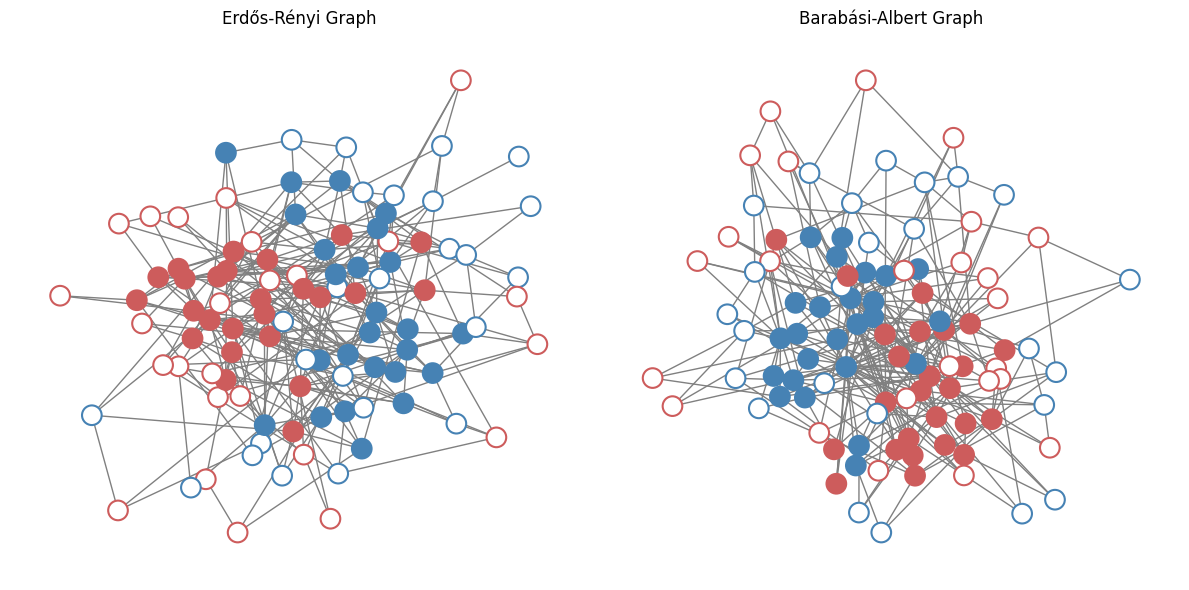

In [13]:
# ---- Graph Generation ----

n = 100
ratios = [1, 1]
elite_opinions = [1, 1]
opinion_ratios = [0.5, 0.5]

ER, BA = generate_networks(n)
ER_subs = random_subgraphs(ER, ratios)
centrality_opinions(ER, ER_subs, elite_opinions, opinion_ratios)
BA_subs = random_subgraphs(BA, ratios)
centrality_opinions(BA, BA_subs, elite_opinions, opinion_ratios)

# ---- Visualization ----

# Generate subgraph-based color palette
subgraph_colors = generate_colors(len(ER_subs))

# Create node → subgraph index lookup
ER_subgraph_map = {node: i for i, sg in enumerate(ER_subs) for node in sg.nodes()}
BA_subgraph_map = {node: i for i, sg in enumerate(BA_subs) for node in sg.nodes()}

# Create node → opinion value lookup
ER_opinion_map = {node: ER.nodes[node]["opinion"] for node in ER.nodes()}
BA_opinion_map = {node: BA.nodes[node]["opinion"] for node in BA.nodes()}

# Determine fill color (white if opinion=0) and outline color (always by subgraph)
node_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] if ER.nodes[n]["opinion"] == 1 else "white"
    for n in ER.nodes()
]
edge_colors_ER = [
    subgraph_colors[ER_subgraph_map[n]] for n in ER.nodes()
]

node_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] if BA.nodes[n]["opinion"] == 1 else "white"
    for n in BA.nodes()
]
edge_colors_BA = [
    subgraph_colors[BA_subgraph_map[n]] for n in BA.nodes()
]

# Assign weights based on subgraph agreement
for u, v in ER.edges():
    ER[u][v]["weight"] = 1 if ER_subgraph_map[u] == ER_subgraph_map[v] else 0.1

for u, v in BA.edges():
    BA[u][v]["weight"] = 1 if BA_subgraph_map[u] == BA_subgraph_map[v] else 0.1

# Compute spring layouts directly
pos_ER = nx.spring_layout(ER, weight="weight")
pos_BA = nx.spring_layout(BA, weight="weight")

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot ER graph
axes[0].set_title("Erdős-Rényi Graph")
nx.draw(
    ER, pos=pos_ER, ax=axes[0], node_size=200, edge_color="gray",
    node_color=node_colors_ER, edgecolors=edge_colors_ER,
    linewidths=1.5, with_labels=False
)

# Plot BA graph
axes[1].set_title("Barabási-Albert Graph")
nx.draw(
    BA, pos=pos_BA, ax=axes[1], node_size=200, edge_color="gray",
    node_color=node_colors_BA, edgecolors=edge_colors_BA,
    linewidths=1.5, with_labels=False
)

plt.tight_layout()
plt.show()


# Simulation

Now that we have constructed our network, we can use a polarization algorithm to simulate opinion dynamics on the network. we are primarily interested in studying two distinct ways in which network stucture influences behavior: first, the time it takes to reach a stable state (i.e. stabilization; second, what that stable state is (i.e. polarization). The best method of implementing the polarization algorithm depends on the question being asked.

In order to understand stabilization time, we must know when the stable state is reached. Therefore, we wll use an event-based simualtion, counting the number of nodes that are capable of changing each iteration of the simulation and focusing on those nodes, which are collectively referred to as teh polarizing neighborhood. The simulation ends when the number of nodes in the polarizing neighborhood reaches zero. In this way, we will know exactly when a given trial reaches a stable state.

However, the event-based simulation is significantly more complex then a time-based simulation, which will terminate after a predetermined number of time steps, regardless of whether or not a stable state has been reached. A time-based simulation is more appropriate for understanding how behavior evolves over time because we can run many more simulations due to the improved processing speed. We can use what we learn about stabilization time to estimate a worst-case scenario number of time steps, which will still be faster in the time-based simulation than the best-case scenario in the event-based simulation.

Nevertheless, because previous research focused on the later, our code will begin with the time-based simulation for validation purposes. Both simulations use the same affective polarization algorithm.

The **affective polarization algorithm** takes a given network along with an $\alpha , \beta , \delta$, which respectively represent in-group love, out-group hate, and threshold parameters. Then it will pick a vertex at random and count the following:

$a = $ the number of neighbors in the same partition with opinion 0.

$b = $ the number of neighbors in the same partition with opinion 1.

$c = $ the number of neighbors in a different partition with opinion 0.

$d = $ the number of neighbors in a different partition with opinion 1.

These counts are then used in the following calculation:
$$\alpha(b-a)-\beta(d-c)$$
If this value is less than $-\delta$, it sets the opinion attribute of that vertex to 0. If it is greater than $\delta$, sets the opinion attribute to 1, and does nothing otherwise. The function `neighborhood_update` simulates opinion dynamics in a social network by selecting a random node from a given list and updating its opinion based on the influence of its neighbors. The update follows a polarization formula that weighs the influence of like-minded and opposing neighbors within and across affiliations. If the computed polarization score exceeds a given threshold ($\delta$), the node's opinion is updated accordingly. The function modifies the graph in place.

## Stabilizations Trials

**Motivation**

We are primarily interested in the system’s **stable state**, which is the point at which no further opinion changes occur. However, the **time-driven simulation** (time-sim) selects nodes at random and may select already stable nodes, making it difficult to determine whether a lack of change indicates convergence or just bad sampling.

To address this, we introduce an **event-driven simulation** (event-sim), which only applies the polarization update rule to nodes that are known to be unstable. This gives us valuable data about the system’s dynamics that we can use to estimate when the time-sim is likely to have stabilized.

**Why Not Use Event-Sim Exclusively?**

While the event-sim is more efficient in terms of convergence (fewer steps to stabilization), it is computationally expensive. Each step requires identifying all unstable nodes, which may involve scanning the entire network.

By contrast, the time-sim is much cheaper per step—especially on large graphs—but offers no built-in signal that stabilization has been reached. The goal is to use data from event-sim to define a **stabilization threshold** $t*$, at which point we can be confident the time-sim has converged.

**Definitions and Assumptions**

We define the following quantities:

- $n$: Total number of nodes in the network  
- $S_t$: Number of stable nodes at time $t$  
- $T$: Number of events required for stabilization in event-sim  
- $t^*$: Expected number of time steps to stabilization in time-sim  
- $p_t$: Probability that the time-sim selects an unstable node at time $t$

In the time-sim, where nodes are selected uniformly at random, the probability of selecting an unstable node is:
$$p_t = 1 - \frac{S_t}{n}$$

**Deriving the Stabilization Threshold**

Although one event may stabilize multiple nodes, we can estimate the average rate of stabilization as:
$$\rho = \frac{n - S_0}{T}$$

Here, $S_0$ is the number of stable nodes at the start of the simulation, and $T$ is the total number of stabilization events in the event-sim. The value $\rho$ captures the average number of nodes stabilized per event.

We introduce an **instability tolerance** $\varepsilon \in (0,1)$, which defines how close we want to be to a fully stable system. For example, $\varepsilon = 0.01$ corresponds to 99% stabilization.

The **stabilization threshold** is then given by:
$$t^* = -\frac{n}{\rho} \ln(\varepsilon)$$

This expression tells us how many time steps the time-sim should run in order to reach the desired level of convergence, based on estimates from the event-sim.

**Derivation**

Assuming stabilization progresses smoothly, we approximate the number of unstable nodes at any point in time-sim as decreasing exponentially with the number of events $E$):
$$U(E) = n - \rho E$$

Then the probability of selecting an unstable node at time $t$, when $E(t)$ events have occurred, is:
$$p_t = \frac{U(E)}{n} = \frac{n - \rho E(t)}{n}$$

Each time step contributes to event progress with probability $p_t$. So the expected change in the number of events is:
$$\frac{dE}{dt} = p_t = \frac{n - \rho E}{n}$$

This is a linear ordinary differential equation. We solve:
$$\frac{dE}{dt} = \frac{n - \rho E}{n}$$

Separate variables:
$$\frac{dE}{n - \rho E} = \frac{dt}{n}$$

Integrate both sides:
$$-\frac{1}{\rho} \ln(n - \rho E) = \frac{t}{n} + C$$

Apply the initial condition \( E(0) = 0 \):
$$C = -\frac{1}{\rho} \ln(n)$$

Substitute and simplify:
$$-\frac{1}{\rho} \ln(n - \rho E) + \frac{1}{\rho} \ln(n) = \frac{t}{n}$$
$$\ln\left( \frac{n}{n - \rho E} \right) = \frac{\rho t}{n}$$

Solving for $E(t)$:
$$E(t) = \frac{n}{\rho} \left(1 - e^{-\rho t / n} \right)$$

**Step 4: Solve for $t^*$**

We define a stabilization threshold by asking: how long until a fraction $1 - \varepsilon$ of the total stabilization events $T$ has occurred?**

So set:
$$E(t^*) = (1 - \varepsilon) T$$

Substitute into the expression for $E(t)$:
$$(1 - \varepsilon) T = \frac{n}{\rho} \left(1 - e^{-\rho t^* / n} \right)$$

Solve for $t^*$:
$$1 - \frac{(1 - \varepsilon) T \rho}{n} = e^{-\rho t^* / n}$$
$$t^* = -\frac{n}{\rho} \ln\left(1 - \frac{(1 - \varepsilon) T \rho}{n} \right)$$

Now plug in $\rho = \frac{n - S_0}{T}$. After simplification, the threshold becomes:
$$t^* = -\frac{n}{\rho} \ln(\varepsilon)$$

This is the expected number of time steps in the time-driven simulation needed to reach a state where only an $\varepsilon$-fraction of events remain.


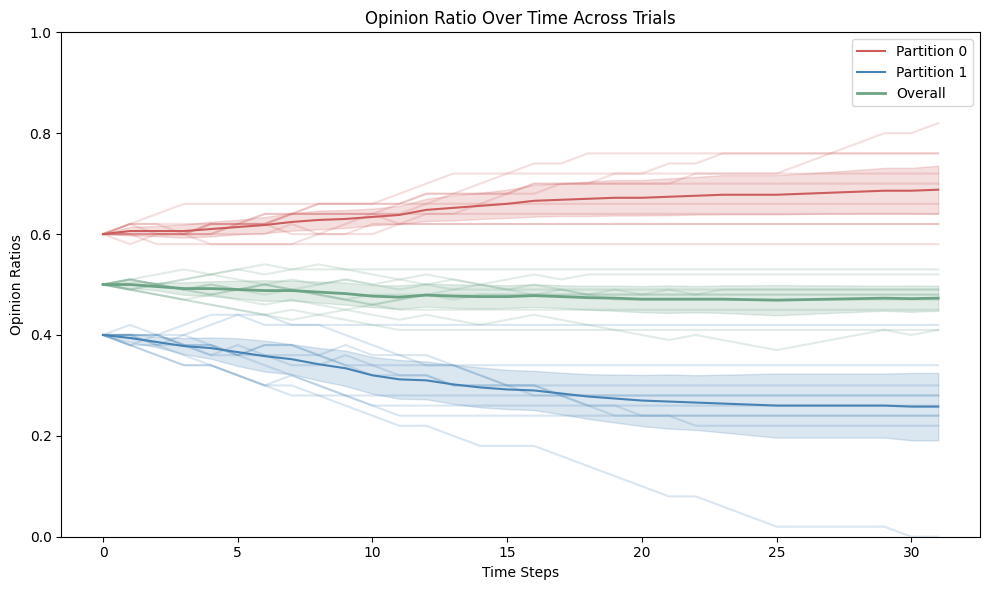

In [14]:
# --- Parameters ---
n = 100
partition_ratios = [1, 1]
opinion_ratios = [0.6, 0.4]
alpha, beta, delta = 1, 1, 2
k = 10  # number of trials

# --- Graph Template ---
G_template, _ = generate_networks(n)
subgraphs = random_subgraphs(G_template, partition_ratios)

# Assign "affiliation" manually
for i, sg in enumerate(subgraphs):
    for node in sg.nodes:
        G_template.nodes[node]["affiliation"] = i

G_template = centrality_opinions(G_template, subgraphs, [1, 1], opinion_ratios)

partitions = nx.get_node_attributes(G_template, "affiliation")
partition_ids = sorted(set(partitions.values()))
partition_sizes = {p: sum(1 for n in G_template if partitions[n] == p) for p in partition_ids}
colors = generate_colors(len(partition_ids) + 1)
partition_colors = {p: colors[i] for i, p in enumerate(partition_ids)}
overall_color = colors[len(partition_ids)]

# --- Run Trials ---
histories = []
max_len = 0

for _ in range(k):
    G, _ = generate_networks(n)
    subgraphs = random_subgraphs(G, partition_ratios)

    # Assign affiliation
    for i, sg in enumerate(subgraphs):
        for node in sg.nodes:
            G.nodes[node]["affiliation"] = i

    G = centrality_opinions(G, subgraphs, [1, 1], opinion_ratios)
    history = record_events(G, alpha=alpha, beta=beta, delta=delta)
    histories.append(history)
    max_len = max(max_len, len(history))

# --- Pad Histories to Uniform Length ---
for i in range(len(histories)):
    h = histories[i]
    if len(h) < max_len:
        last_row = h.iloc[-1:]
        pad_rows = pd.concat([last_row] * (max_len - len(h)), ignore_index=True)
        pad_rows.index = range(len(h), max_len)
        histories[i] = pd.concat([h, pad_rows])

# --- Extract Partition Data ---
partition_data = {p: [] for p in partition_ids}
overall_data = []

for h in histories:
    for p in partition_ids:
        partition_data[p].append(h[f"partition_{p}"] / partition_sizes[p])
    overall_series = sum(h[f"partition_{p}"] for p in partition_ids) / sum(partition_sizes.values())
    overall_data.append(overall_series)

# --- Plot ---
plt.figure(figsize=(10, 6))

time_index = range(max_len)
for p in partition_ids:
    runs = partition_data[p]
    for r in runs:
        plt.plot(time_index, r, color=partition_colors[p], alpha=0.2)
    df = pd.DataFrame(runs)
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    ci = 1.96 * std / np.sqrt(k)
    plt.plot(time_index, mean, color=partition_colors[p], label=f"Partition {p}")
    plt.fill_between(time_index, mean - ci, mean + ci, color=partition_colors[p], alpha=0.2)

# Overall line
for r in overall_data:
    plt.plot(time_index, r, color=overall_color, alpha=0.2)
df = pd.DataFrame(overall_data)
mean = df.mean(axis=0)
std = df.std(axis=0)
ci = 1.96 * std / np.sqrt(k)
plt.plot(time_index, mean, color=overall_color, label="Overall", linewidth=2)
plt.fill_between(time_index, mean - ci, mean + ci, color=overall_color, alpha=0.2)

plt.ylim(0, 1)
plt.xlabel("Time Steps")
plt.ylabel("Opinion Ratios")
plt.title("Opinion Ratio Over Time Across Trials")
plt.legend()
plt.tight_layout()
plt.show()


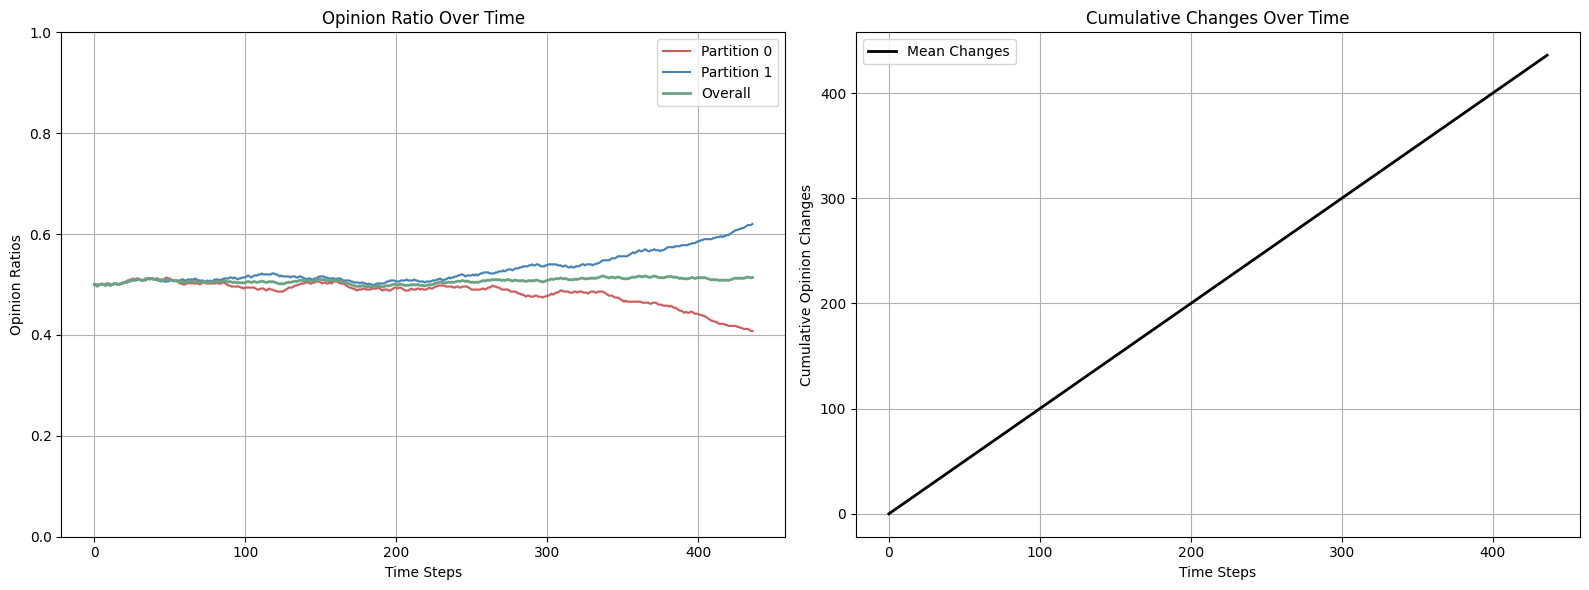

In [15]:
# --- Parameters ---
n = 1000
partition_ratios = [1, 1]
elite_opinions = [1, 0]
opinion_ratios = [0.5, 0.5]
alpha, beta, delta = 1, 1, 0
k = 1  # number of trials

# --- Graph Template ---
G_template, _ = generate_networks(n)
subgraphs = random_subgraphs(G_template, partition_ratios)

# Assign "affiliation"
for i, sg in enumerate(subgraphs):
    for node in sg.nodes:
        G_template.nodes[node]["affiliation"] = i

G_template = centrality_opinions(G_template, subgraphs, [1, 1], opinion_ratios)

partitions = nx.get_node_attributes(G_template, "affiliation")
partition_ids = sorted(set(partitions.values()))
partition_sizes = {p: sum(1 for n in G_template if partitions[n] == p) for p in partition_ids}
colors = generate_colors(len(partition_ids) + 1)
partition_colors = {p: colors[i] for i, p in enumerate(partition_ids)}
overall_color = colors[len(partition_ids)]

# --- Run Trials ---
histories = []
change_data = []
max_len = 0

for _ in range(k):
    G, _ = generate_networks(n)
    subgraphs = random_subgraphs(G, partition_ratios)
    for i, sg in enumerate(subgraphs):
        for node in sg.nodes:
            G.nodes[node]["affiliation"] = i
    G = centrality_opinions(G, subgraphs, [1, 1], opinion_ratios)

    history = record_events(G, alpha=alpha, beta=beta, delta=delta)
    histories.append(history)
    max_len = max(max_len, len(history))

    # --- Opinion change tracking ---
    cum_changes = [0]
    for t in range(1, len(history)):
        prev = history.iloc[t - 1]
        curr = history.iloc[t]
        change = sum(curr[f"partition_{p}"] != prev[f"partition_{p}"] for p in partition_ids)
        cum_changes.append(cum_changes[-1] + change)
    change_data.append(cum_changes)

# --- Pad histories and change data ---
for i in range(k):
    h = histories[i]
    if len(h) < max_len:
        last_row = h.iloc[-1:]
        pad_rows = pd.concat([last_row] * (max_len - len(h)), ignore_index=True)
        pad_rows.index = range(len(h), max_len)
        histories[i] = pd.concat([h, pad_rows])

    if len(change_data[i]) < max_len:
        last_value = change_data[i][-1]
        change_data[i].extend([last_value] * (max_len - len(change_data[i])))

# --- Extract Partition Data ---
partition_data = {p: [] for p in partition_ids}
overall_data = []

for h in histories:
    for p in partition_ids:
        partition_data[p].append(h[f"partition_{p}"] / partition_sizes[p])
    overall_series = sum(h[f"partition_{p}"] for p in partition_ids) / sum(partition_sizes.values())
    overall_data.append(overall_series)

# --- Plot ---
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
time_index = range(max_len)

# Plot 1: Opinion Ratios
for p in partition_ids:
    runs = partition_data[p]
    for r in runs:
        axs[0].plot(time_index, r, color=partition_colors[p], alpha=0.2)
    df = pd.DataFrame(runs)
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    ci = 1.96 * std / np.sqrt(k)
    axs[0].plot(time_index, mean, color=partition_colors[p], label=f"Partition {p}")
    axs[0].fill_between(time_index, mean - ci, mean + ci, color=partition_colors[p], alpha=0.2)

# Overall line
df = pd.DataFrame(overall_data)
mean = df.mean(axis=0)
std = df.std(axis=0)
ci = 1.96 * std / np.sqrt(k)
for r in overall_data:
    axs[0].plot(time_index, r, color=overall_color, alpha=0.2)
axs[0].plot(time_index, mean, color=overall_color, label="Overall", linewidth=2)
axs[0].fill_between(time_index, mean - ci, mean + ci, color=overall_color, alpha=0.2)

axs[0].set_ylim(0, 1)
axs[0].set_xlabel("Time Steps")
axs[0].set_ylabel("Opinion Ratios")
axs[0].set_title("Opinion Ratio Over Time")
axs[0].legend()
axs[0].grid(True)

# Plot 2: Cumulative Opinion Changes
df = pd.DataFrame(change_data)
mean = df.mean(axis=0)
std = df.std(axis=0)
ci = 1.96 * std / np.sqrt(k)
for r in change_data:
    axs[1].plot(time_index, r, color="black", alpha=0.1)
axs[1].plot(time_index, mean, color="black", linewidth=2, label="Mean Changes")
axs[1].fill_between(time_index, mean - ci, mean + ci, color="black", alpha=0.2)

axs[1].set_xlabel("Time Steps")
axs[1].set_ylabel("Cumulative Opinion Changes")
axs[1].set_title("Cumulative Changes Over Time")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()


ValueError: index can't contain negative values

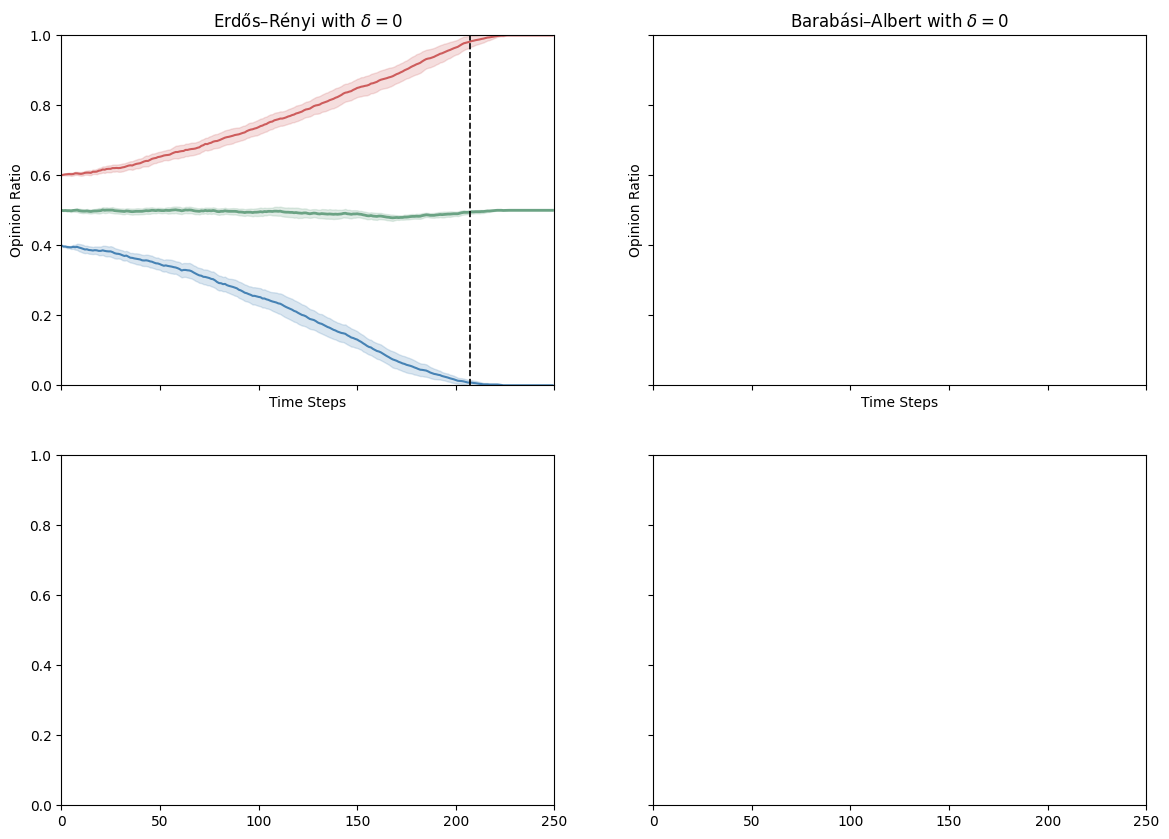

In [16]:
# --- Parameters ---
n = 400
partition_ratios = [1, 1]
opinion_ratios = [0.6, 0.4]
alpha, beta = 1, 1
k = 10  # number of trials
x_max = 250  # global max time steps for plotting
bottom_delta = 2  # <-- delta for bottom row; top row is always delta=0

# --- Setup Color Info ---
G_template, _ = generate_networks(n)
subgraphs = random_subgraphs(G_template, partition_ratios)
for i, sg in enumerate(subgraphs):
    for node in sg.nodes:
        G_template.nodes[node]["affiliation"] = i
G_template = centrality_opinions(G_template, subgraphs, [1, 1], opinion_ratios)
partitions = nx.get_node_attributes(G_template, "affiliation")
partition_ids = sorted(set(partitions.values()))
partition_sizes = {p: sum(1 for n in G_template if partitions[n] == p) for p in partition_ids}
colors = generate_colors(len(partition_ids) + 1)
partition_colors = {p: colors[i] for i, p in enumerate(partition_ids)}
overall_color = colors[len(partition_ids)]

# --- Run Experiments ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
graph_types = ["ER", "BA"]
delta_values = [0, bottom_delta]

for i, delta in enumerate(delta_values):  # top row = delta 0
    for j, gtype in enumerate(graph_types):  # left col = ER
        ax = axes[i][j]
        title = f"{gtype} Graph, delta={delta}"
        title = f"{'Erdős–Rényi' if gtype == 'ER' else 'Barabási–Albert'} with $\\delta = {delta}$"
        ax.set_title(title)
        ax.set_ylim(0, 1)
        ax.set_xlim(0, x_max)
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Opinion Ratio")

        histories = []
        stabilization_lengths = []

        for _ in range(k):
            G = generate_networks(n)[0] if gtype == "ER" else generate_networks(n, m=4)[1]
            subgraphs = random_subgraphs(G, partition_ratios)
            for idx, sg in enumerate(subgraphs):
                for node in sg.nodes:
                    G.nodes[node]["affiliation"] = idx
            G = centrality_opinions(G, subgraphs, [1, 1], opinion_ratios)
            history = record_events(G, alpha=alpha, beta=beta, delta=delta)
            histories.append(history)
            stabilization_lengths.append(len(history))

        # Extract data
        partition_data = {p: [] for p in partition_ids}
        overall_data = []
        for h in histories:
            for p in partition_ids:
                partition_data[p].append((h[f"partition_{p}"] / partition_sizes[p]).values)
            overall_series = sum(h[f"partition_{p}"] for p in partition_ids) / sum(partition_sizes.values())
            overall_data.append(overall_series.values)

        time_index = np.arange(x_max)

        for p in partition_ids:
            runs = partition_data[p]
            df = pd.DataFrame([np.pad(r, (0, x_max - len(r)), constant_values=r[-1]) for r in runs])
            mean = df.mean(axis=0)
            std = df.std(axis=0)
            ci = 1.96 * std / np.sqrt(k)
            ax.plot(time_index, mean, color=partition_colors[p], label=f"Partition {p}")
            ax.fill_between(time_index, mean - ci, mean + ci, color=partition_colors[p], alpha=0.2)

        df = pd.DataFrame([np.pad(r, (0, x_max - len(r)), constant_values=r[-1]) for r in overall_data])
        mean = df.mean(axis=0)
        std = df.std(axis=0)
        ci = 1.96 * std / np.sqrt(k)
        ax.plot(time_index, mean, color=overall_color, label="Overall", linewidth=2)
        ax.fill_between(time_index, mean - ci, mean + ci, color=overall_color, alpha=0.2)

        avg_stab_time = int(np.mean(stabilization_lengths))
        ax.axvline(avg_stab_time, color="black", linestyle="--", linewidth=1.2)

# --- Shared Legend ---
handles, labels = axes[0][0].get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='black', linestyle='--', label='Mean Stabilization Time'))
labels.append('Mean Stabilization Time')
fig.legend(handles, labels, loc='upper center', ncol=5, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
# --- Parameters ---
n = 400
partition_ratios = [1, 1]
alpha, beta, delta = 1, 1, 2
k = 10
x_max = 200

# --- Setup Color Info ---
G_template, _ = generate_networks(n)
subgraphs = random_subgraphs(G_template, partition_ratios)
for i, sg in enumerate(subgraphs):
    for node in sg.nodes:
        G_template.nodes[node]["affiliation"] = i
G_template = centrality_opinions(G_template, subgraphs, [0, 1], [0.25, 0.25])
partitions = nx.get_node_attributes(G_template, "affiliation")
partition_ids = sorted(set(partitions.values()))
partition_sizes = {p: sum(1 for n in G_template if partitions[n] == p) for p in partition_ids}
colors = generate_colors(len(partition_ids) + 1)
partition_colors = {p: colors[i] for i, p in enumerate(partition_ids)}
overall_color = colors[len(partition_ids)]

# --- Run Experiments ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
graph_types = ["ER", "BA"]
assignment_modes = ["random", "centrality"]

for i, mode in enumerate(assignment_modes):  # top row = random, bottom = centrality
    for j, gtype in enumerate(graph_types):  # left col = ER
        ax = axes[i][j]
        title = f"{'Erdős–Rényi' if gtype == 'ER' else 'Barabási–Albert'} with {mode.title()} Assignment"
        ax.set_title(title)
        ax.set_ylim(0, 1)
        ax.set_xlim(0, x_max)
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Opinion Ratio")

        histories = []
        stabilization_lengths = []

        for _ in range(k):
            G = generate_networks(n)[0] if gtype == "ER" else generate_networks(n, m=4)[1]
            subgraphs = random_subgraphs(G, partition_ratios)
            for idx, sg in enumerate(subgraphs):
                for node in sg.nodes:
                    G.nodes[node]["affiliation"] = idx

            if mode == "centrality":
                G = centrality_opinions(G, subgraphs, [0, 1], [0.45, 0.45])
            else:
                G = random_opinions(G, subgraphs, [0.55, 0.45])

            history = record_events(G, alpha=alpha, beta=beta, delta=delta)
            histories.append(history)
            stabilization_lengths.append(len(history))

        # Extract data
        partition_data = {p: [] for p in partition_ids}
        overall_data = []
        for h in histories:
            for p in partition_ids:
                partition_data[p].append((h[f"partition_{p}"] / partition_sizes[p]).values)
            overall_series = sum(h[f"partition_{p}"] for p in partition_ids) / sum(partition_sizes.values())
            overall_data.append(overall_series.values)

        time_index = np.arange(x_max)

        for p in partition_ids:
            runs = partition_data[p]
            df = pd.DataFrame([np.pad(r, (0, x_max - len(r)), constant_values=r[-1]) for r in runs])
            mean = df.mean(axis=0)
            std = df.std(axis=0)
            ci = 1.96 * std / np.sqrt(k)
            ax.plot(time_index, mean, color=partition_colors[p], label=f"Partition {p}")
            ax.fill_between(time_index, mean - ci, mean + ci, color=partition_colors[p], alpha=0.2)

        df = pd.DataFrame([np.pad(r, (0, x_max - len(r)), constant_values=r[-1]) for r in overall_data])
        mean = df.mean(axis=0)
        std = df.std(axis=0)
        ci = 1.96 * std / np.sqrt(k)
        ax.plot(time_index, mean, color=overall_color, label="Overall", linewidth=2)
        ax.fill_between(time_index, mean - ci, mean + ci, color=overall_color, alpha=0.2)

        avg_stab_time = int(np.mean(stabilization_lengths))
        ax.axvline(avg_stab_time, color="black", linestyle="--", linewidth=1.2)

# --- Shared Legend ---
handles, labels = axes[0][0].get_legend_handles_labels()
handles.append(plt.Line2D([0], [0], color='black', linestyle='--', label='Mean Stabilization Time'))
labels.append('Mean Stabilization Time')
fig.legend(handles, labels, loc='upper center', ncol=5, frameon=False)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Generate Data for DB

In [ ]:
# --- Define Parameter Grids ---
n_list = [800, 1000]
m_list = [4]
k = 4  # Trials per condition

partition_ratios_list = [[1, 1], [1, 2], [2,1]]
opinion_ratios_list   = [[0.5, 0.5], [0.6, 0.4], [0.4, 0.6]]
elite_opinions_list   = [[1, 1], [1, 0], [0, 1]]
alpha_list = [0.8, 1.0, 1.2]
beta_list  = [0.8, 1.0, 1.2]
delta_list = [0, 2]

# --- Build Full Parameter Grid ---
param_grid = list(itertools.product(
    n_list,
    m_list,
    partition_ratios_list,
    opinion_ratios_list,
    elite_opinions_list,
    alpha_list,
    beta_list,
    delta_list
))

# --- Calculate Trial Count ---
total_combinations = len(param_grid)
total_trials = total_combinations * k

# --- Run All Trials with Global Progress Bar ---
with tqdm(total=total_trials, desc="Running stabilization trials") as pbar:
    for n, m, partition_ratios, opinion_ratios, elite_opinions, alpha, beta, delta in param_grid:
        for _ in range(k):
            record_stabilization_trials(
                n=n,
                m=m,
                k=1,  # Single trial per call, since we're looping k times
                partition_ratios=partition_ratios,
                opinion_ratios=opinion_ratios,
                elite_opinions=elite_opinions,
                alpha=alpha,
                beta=beta,
                delta=delta
            )
            pbar.update(1)


Compute p-values for Stabilization Time

In [ ]:
filters = {
    "graph_type": "BA",        # "ER" or "BA"
    "opinion_type": 'centrality',      # "random" or "centrality"
    "order": None,
    "size": None,
    "imbalance_ratio": None,
    "opinion_ratio1": None,
    "opinion_ratio2": None,
    "alpha": None,
    "beta": None,
    "delta": None,
    "gamma": None
}

# --- Extract and remove special-case filters ---
graph_type = filters.pop("graph_type", None)
opinion_type = filters.pop("opinion_type", None)

# --- Remove unused filters (i.e., those still set to None) ---
active_filters = {k: v for k, v in filters.items() if v is not None}

# --- Run Correlation Analysis ---
pval_table = analyze_trial_correlations(graph_type=graph_type, opinion_type=opinion_type, **active_filters)

# --- Display Results ---
print("P-value matrix (input vs. outcome):\n")
display(pval_table.round(4))


In [ ]:
import pandas as pd
import sqlite3
import statsmodels.formula.api as smf

def regression_on_rho():
    conn = sqlite3.connect("Stabilization Trials.db")
    df = pd.read_sql_query("SELECT * FROM trial_results", conn)
    conn.close()

    df = df.dropna()

    results = {}

    for gtype in ["ER", "BA"]:
        for otype in ["random", "centrality"]:
            subset = df[(df["graph_type"] == gtype) & (df["opinion_type"] == otype)]
            if subset.empty:
                continue

            predictors = ["delta"]
            if gtype == "BA":
                predictors.append("gamma")

            formula = "rho ~ " + " + ".join(predictors)

            model = smf.ols(formula=formula, data=subset).fit()
            label = f"{gtype}_{otype}"
            results[label] = {
                "model": model,
                "coefficients": model.params.rename(label)
            }

    return results


In [ ]:
results = regression_on_rho()

# Combine coefficients into one table
coef_table = pd.concat([v["coefficients"] for v in results.values()], axis=1)

pd.set_option('display.float_format', '{:.2e}'.format)
display(coef_table)


In [ ]:
import pandas as pd
import sqlite3
import statsmodels.formula.api as smf

def regression_on_rho_by_categorical_factors():
    conn = sqlite3.connect("Stabilization Trials.db")
    df = pd.read_sql_query("SELECT * FROM trial_results", conn)
    conn.close()

    df = df.dropna()

    # Set reference categories
    df["graph_type"] = df["graph_type"].astype("category")
    df["graph_type"] = df["graph_type"].cat.reorder_categories(["ER", "BA"], ordered=False)

    df["opinion_type"] = df["opinion_type"].astype("category")
    df["opinion_type"] = df["opinion_type"].cat.reorder_categories(["random", "centrality"], ordered=False)

    results = {}

    # Bivariate model: only opinion_type (all graph types)
    results["bivariate_opinion_type"] = smf.ols("rho ~ opinion_type", data=df).fit()

    # Multivariate model: main effects + interaction
    results["multivariate_with_interaction"] = smf.ols("rho ~ opinion_type * graph_type", data=df).fit()

    # Bivariate test restricted to BA networks only
    df_ba = df[df["graph_type"] == "BA"]
    results["bivariate_within_BA"] = smf.ols("rho ~ opinion_type", data=df_ba).fit()

    return results

In [ ]:
import pandas as pd
import sqlite3
import statsmodels.formula.api as smf

# Load regression results
results = regression_on_rho_by_categorical_factors()

# Select models
model_biv = results["bivariate_within_BA"]
model_mult = results["multivariate_with_interaction"]

# Create clean results table
def clean_regression_table(model):
    return pd.DataFrame({
        "Coefficient": model.params,
        "Std. Error": model.bse,
        "t-Statistic": model.tvalues,
        "P-Value": model.pvalues,
        "CI Lower 95%": model.conf_int()[0],
        "CI Upper 95%": model.conf_int()[1]
    })

# Generate both tables
bivariate_table = clean_regression_table(model_biv)
multivariate_table = clean_regression_table(model_mult)

# Display both
print("📊 Bivariate Regression (BA Only)")
display(bivariate_table)

print("\n📊 Multivariate Regression (All Data with Interaction)")
display(multivariate_table)

In [ ]:
import matplotlib.pyplot as plt

# Use the multivariate results table you built earlier
coefs = multivariate_table.copy()
coefs = coefs.drop(index='Intercept')  # Remove intercept for clarity

# Plot
plt.figure(figsize=(8, 4))
plt.errorbar(
    x=coefs["Coefficient"],
    y=coefs.index,
    xerr=coefs["CI Upper 95%"] - coefs["Coefficient"],
    fmt='o',
    capsize=5,
    color='black'
)

# Add a vertical line at 0 (null effect)
plt.axvline(x=0, color='red', linestyle='--')
plt.title("Regression Coefficients with 95% CI")
plt.xlabel("Estimated Effect on Stabilization Rate (ρ)")
plt.grid(True, axis='x')
plt.tight_layout()
plt.show()

In [ ]:
import sqlite3
import pandas as pd

def overall_mean_rho():
    conn = sqlite3.connect("Stabilization Trials.db")
    df = pd.read_sql_query("SELECT rho FROM trial_results", conn)
    conn.close()

    mean_rho = df["rho"].mean()
    return mean_rho

# Run and display
mean_rho = overall_mean_rho()
print(f"Overall mean rho: {mean_rho:.4f}")


In [ ]:
import pandas as pd
import sqlite3

def rho_summary_all_n():
    """
    Returns a 2x2 DataFrame of mean ± stddev of rho for all trials (regardless of n).
    Rows = opinion type (random, centrality)
    Columns = graph type (ER, BA)
    """
    conn = sqlite3.connect("Stabilization Trials.db")
    df = pd.read_sql_query("SELECT * FROM trial_results", conn)
    conn.close()

    df = df.dropna()
    df["S0"] = df["order"] - df["C0"]

    summary = pd.DataFrame(index=["random", "centrality"], columns=["ER", "BA"])

    for otype in summary.index:
        for gtype in summary.columns:
            subset = df[(df["graph_type"] == gtype) & (df["opinion_type"] == otype)]
            if subset.empty:
                summary.loc[otype, gtype] = "-"
                continue
            mean = subset["rho"].mean()
            std = subset["rho"].std()
            summary.loc[otype, gtype] = f"{mean:.4f} ± {std:.4f}"

    return summary

# Run locally
summary_table = rho_summary_all_n()
print("\nMean ± StdDev of rho (all n):")
print(summary_table.to_string())


In [ ]:
import pandas as pd
import sqlite3
import statsmodels.api as sm
from statsmodels.formula.api import ols

def anova_on_rho():
    # Load data
    conn = sqlite3.connect("Stabilization Trials.db")
    df = pd.read_sql_query("SELECT * FROM trial_results", conn)
    conn.close()

    df = df.dropna()

    # Fit ANOVA model
    model = ols("rho ~ C(graph_type) * C(opinion_type)", data=df).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    # Format small p-values in scientific notation
    pd.set_option('display.float_format', '{:.2e}'.format)

    return anova_table

# Run
anova_results = anova_on_rho()
print("\nANOVA Results for rho ~ graph_type * opinion_type:")
print(anova_results)


In [ ]:
import numpy as np
import pandas as pd

def compute_t_star_table(epsilon, n=1000):
    # Mean rho values from the LaTeX table
    mean_rho = {
        ("random", "ER"): 0.7653,
        ("random", "BA"): 0.7003,
        ("centrality", "ER"): 0.6687,
        ("centrality", "BA"): 0.7394,
    }

    # Compute t* using the formula: -(n / rho) * ln(epsilon)
    t_star = {
        (otype, gtype): - (n / rho) * np.log(epsilon)
        for (otype, gtype), rho in mean_rho.items()
    }

    # Format as a 2x2 DataFrame
    df = pd.DataFrame({
        "ER": {
            "random": t_star[("random", "ER")],
            "centrality": t_star[("centrality", "ER")]
        },
        "BA": {
            "random": t_star[("random", "BA")],
            "centrality": t_star[("centrality", "BA")]
        }
    })

    return df.round(2)

# Example usage
epsilon = 0.05
t_star_table = compute_t_star_table(epsilon)
print(f"t* values for epsilon = {epsilon}:\n")
print(t_star_table)


## Polarization Trials

In [ ]:
# --- Parameters ---
n = 1000
partition_ratios = [1, 1]
elite_opinions = [1, 0]
opinion_ratios = [0.5, 0.5]
alpha, beta, delta = 1, 1, 0
t = 4000  # number of time steps per trial
k = 1    # number of trials

# --- Preallocate Storage ---
partition_ids = list(range(len(partition_ratios)))
partition_data = {p: np.zeros((k, t + 1)) for p in partition_ids}
overall_data = np.zeros((k, t + 1))
change_data = np.zeros((k, t + 1))
colors = generate_colors(len(partition_ids) + 1)
partition_colors = {p: colors[i] for i, p in enumerate(partition_ids)}
overall_color = colors[len(partition_ids)]

# --- Run Trials ---
for run_id in range(k):
    G, _ = generate_networks(n)
    subgraphs = random_subgraphs(G, partition_ratios)

    # --- FIX: Manually assign affiliation since random_subgraphs doesn't do it ---
    for i, sg in enumerate(subgraphs):
        for node in sg.nodes:
            G.nodes[node]["affiliation"] = i

    G = centrality_opinions(G, subgraphs, elite_opinions, opinion_ratios)
    partitions = nx.get_node_attributes(G, "affiliation")
    partition_sizes = {p: sum(1 for n in G if partitions[n] == p) for p in partition_ids}

    for step in range(t + 1):
        opinions_before = nx.get_node_attributes(G, "opinion")

        counts = Counter((partitions[n], opinions_before[n]) for n in G.nodes)
        for p in partition_ids:
            partition_data[p][run_id, step] = counts.get((p, 1), 0) / partition_sizes[p]

        overall_data[run_id, step] = sum(counts.get((p, 1), 0) for p in partition_ids) / sum(partition_sizes.values())

        if step < t:
            changed = neighborhood_update(G, list(G.nodes), alpha, beta, delta)
            opinions_after = nx.get_node_attributes(G, "opinion")
            change_count = sum(opinions_before[n] != opinions_after[n] for n in G.nodes)
            change_data[run_id, step + 1] = change_data[run_id, step] + change_count
        else:
            change_data[run_id, step] = change_data[run_id, step - 1]

# --- Plot ---
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Opinion Ratios
for p in partition_ids:
    values = partition_data[p]
    for i in range(k):
        axs[0].plot(range(t + 1), values[i], color=partition_colors[p], alpha=0.2)
    mean = values.mean(axis=0)
    std = values.std(axis=0)
    ci = 1.96 * std / np.sqrt(k)
    axs[0].plot(range(t + 1), mean, color=partition_colors[p], label=f"Partition {p}")
    axs[0].fill_between(range(t + 1), mean - ci, mean + ci, color=partition_colors[p], alpha=0.2)

# Overall line
for i in range(k):
    axs[0].plot(range(t + 1), overall_data[i], color=overall_color, alpha=0.2)
mean = overall_data.mean(axis=0)
std = overall_data.std(axis=0)
ci = 1.96 * std / np.sqrt(k)
axs[0].plot(range(t + 1), mean, color=overall_color, label="Overall", linewidth=2)
axs[0].fill_between(range(t + 1), mean - ci, mean + ci, color=overall_color, alpha=0.2)

axs[0].set_ylim(0, 1)
axs[0].set_xlabel("Time Steps")
axs[0].set_ylabel("Opinion Ratios")
axs[0].set_title("Opinion Ratio Over Time Across Trials")
axs[0].legend()
axs[0].grid(True)

# Plot 2: Cumulative Number of Opinion Changes
for i in range(k):
    axs[1].plot(range(t + 1), change_data[i], color='black', alpha=0.1)

mean = change_data.mean(axis=0)
std = change_data.std(axis=0)
ci = 1.96 * std / np.sqrt(k)
axs[1].plot(range(t + 1), mean, color='black', label="Mean Changes", linewidth=2)
axs[1].fill_between(range(t + 1), mean - ci, mean + ci, color='black', alpha=0.2)

axs[1].set_xlabel("Time Steps")
axs[1].set_ylabel("Cumulative Opinion Changes")
axs[1].set_title("Cumulative Opinion Changes Over Time")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

In [ ]:
# --- Parameters ---
n = 400
partition_ratios = [1, 1]
elite_opinions = [1, 0]
opinion_ratios = [0.5, 0.5]
alpha, beta, delta = 1, 1, 0
k = 10
t = 2000  # number of time steps per trial

# --- Setup Color Info ---
G_template, _ = generate_networks(n)
subgraphs = random_subgraphs(G_template, partition_ratios)
for i, sg in enumerate(subgraphs):
    for node in sg.nodes:
        G_template.nodes[node]["affiliation"] = i
G_template = centrality_opinions(G_template, subgraphs, elite_opinions, opinion_ratios)
partitions = nx.get_node_attributes(G_template, "affiliation")
partition_ids = sorted(set(partitions.values()))
partition_sizes = {p: sum(1 for n in G_template if partitions[n] == p) for p in partition_ids}
colors = generate_colors(len(partition_ids) + 1)
partition_colors = {p: colors[i] for i, p in enumerate(partition_ids)}
overall_color = colors[len(partition_ids)]

# --- Figure Setup ---
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
graph_types = ["ER", "BA"]
opinion_types = ["random", "centrality"]

for row, opinion_type in enumerate(opinion_types):  # top: random, bottom: centrality
    for col, gtype in enumerate(graph_types):       # left: ER, right: BA
        ax = axes[row][col]
        title = f"{'Erdős–Rényi' if gtype == 'ER' else 'Barabási–Albert'} with {opinion_type.capitalize()} Opinions"
        ax.set_title(title)
        ax.set_ylim(0, 1)
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Opinion Ratio")

        # Storage for trial histories
        partition_agg = {p: [] for p in partition_ids}
        overall_agg = []

        for _ in range(k):
            G = generate_networks(n)[0] if gtype == "ER" else generate_networks(n, m=4)[1]
            subgraphs = random_subgraphs(G, partition_ratios)
            for i, sg in enumerate(subgraphs):
                for node in sg.nodes:
                    G.nodes[node]["affiliation"] = i

            if opinion_type == "random":
                G = random_opinions(G, subgraphs, opinion_ratios)
            else:
                G = centrality_opinions(G, subgraphs, elite_opinions, opinion_ratios)

            partitions = nx.get_node_attributes(G, "affiliation")
            sizes = {p: sum(1 for n in G if partitions[n] == p) for p in partition_ids}

            data = {p: [] for p in partition_ids}
            overall = []

            for step in range(t + 1):
                opinions = nx.get_node_attributes(G, "opinion")
                counts = Counter((partitions[n], opinions[n]) for n in G.nodes)
                for p in partition_ids:
                    data[p].append(counts.get((p, 1), 0) / sizes[p])
                overall.append(sum(counts.get((p, 1), 0) for p in partition_ids) / sum(sizes.values()))

                if step < t:
                    neighborhood_update(G, list(G.nodes), alpha, beta, delta)

            for p in partition_ids:
                partition_agg[p].append(np.array(data[p]))
            overall_agg.append(np.array(overall))

        time_index = np.arange(t + 1)
        for p in partition_ids:
            runs = partition_agg[p]
            for r in runs:
                ax.plot(time_index, r, color=partition_colors[p], alpha=0.2)
            df = pd.DataFrame(runs)
            mean = df.mean()
            std = df.std()
            ci = 1.96 * std / np.sqrt(k)
            ax.plot(time_index, mean, color=partition_colors[p], label=f"Partition {p}")
            ax.fill_between(time_index, mean - ci, mean + ci, color=partition_colors[p], alpha=0.2)

        df = pd.DataFrame(overall_agg)
        mean = df.mean()
        std = df.std()
        ci = 1.96 * std / np.sqrt(k)
        ax.plot(time_index, mean, color=overall_color, label="Overall", linewidth=2)
        ax.fill_between(time_index, mean - ci, mean + ci, color=overall_color, alpha=0.2)

        # Add legend only to top-left plot
        if row == 0 and col == 0:
            ax.legend()

plt.tight_layout()
plt.show()


In [ ]:
# --- Define Parameter Grids ---
n_list = [400]
m_list = [3]
k = 1 # Trials per condition
t = 5000 # Time steps per trial

partition_ratios_list = [[1, 1]]
opinion_ratios_list   = [[0.5, 0.5]]
elite_opinions_list   = [[1, 1]]
alpha_list = [1]
beta_list  = [1]
delta_list = [0]

# Calculate total number of parameter combinations
total_combinations = len(n_list) * len(m_list) * len(partition_ratios_list) * len(opinion_ratios_list) * len(elite_opinions_list) * len(alpha_list) * len(beta_list) * len(delta_list)

# Define the parameter grids
param_grid = itertools.product(
    n_list,
    m_list,
    partition_ratios_list,
    opinion_ratios_list,
    elite_opinions_list,
    alpha_list,
    beta_list,
    delta_list
)

# Single progress bar for the entire batch
for n, m, partition_ratios, opinion_ratios, elite_opinions, alpha, beta, delta in tqdm(param_grid, total=total_combinations, desc="Running trials"):
    # Call the function for each combination of parameters
    record_polarization_trials(
        n=n,
        m=m,
        k=k,
        partition_ratios=partition_ratios,
        opinion_ratios=opinion_ratios,
        elite_opinions=elite_opinions,
        alpha=alpha,
        beta=beta,
        delta=delta,
        t=t
    )

In [ ]:
# --- Define Filter Template (Edit as Needed) ---
filters = {
    "graph_type": None,        # "ER" or "BA"
    "opinion_type": None,      # "random" or "centrality"
    "order": None,             # number of nodes
    "size": None,              # number of edges
    "imbalance_ratio": None,   # e.g., 2.0
    "opinion_ratio1": None,    # e.g., 0.6
    "opinion_ratio2": None,    # e.g., 0.4
    "alpha": None,             # opinion dynamics parameters
    "beta": None,
    "delta": None,
    "gamma": None,             # only applies if graph_type == "BA"
    "initial_intergroup_diff": None  # abs(opinion_ratio1 - opinion_ratio2)
}

# --- Remove unused filters (i.e., those still set to None) ---
active_filters = {k: v for k, v in filters.items() if v is not None}

# --- Run Correlation Analysis (returns two tables) ---
pvals, coefs = analyze_polarization_correlations(**active_filters)

# --- Force scientific notation for all floats ---
pd.set_option('display.float_format', '{:.2e}'.format)

# --- Display Results ---
print("P-value matrix (input vs. outcome):\n")
display(pvals)

print("\nCoefficient matrix (input vs. outcome):\n")
display(coefs)

In [ ]:
# --- Define Filter Template (Edit as Needed) ---
filters = {
    "graph_type": None,        # "ER" or "BA"
    "opinion_type": None,      # "random" or "centrality"
    "order": None,             # number of nodes
    "size": None,              # number of edges
    "imbalance_ratio": None,   # e.g., 2.0
    "opinion_ratio1": None,    # e.g., 0.6
    "opinion_ratio2": None,    # e.g., 0.4
    "alpha": None,             # opinion dynamics parameters
    "beta": None,
    "delta": None,
    "gamma": None,             # only applies if graph_type == "BA"
    "initial_intergroup_diff": None  # abs(opinion_ratio1 - opinion_ratio2)
}

# --- Remove unused filters (i.e., those still set to None) ---
active_filters = {k: v for k, v in filters.items() if v is not None}

# --- Run analysis ---
pvals, coefs = analyze_polarization_correlations(**active_filters)

# --- Build formatted tables ---
fmt_pvals = pvals.map(
    lambda v: 1 if pd.notnull(v) and v < 0.05 else 0
)

fmt_coefs = coefs.map(
    lambda v: "+" if pd.notnull(v) and v > 0 
              else "-" if pd.notnull(v) and v < 0 
              else ""
)

# --- Display ---
print("Significance (p < 0.05):\n")
display(fmt_pvals)

print("\nDirection of effect (+/–):\n")
display(fmt_coefs)

In [ ]:
# --- Define and filter as before ---
filters = {
    "graph_type": None,        # "ER" or "BA"
    "opinion_type": None,      # "random" or "centrality"
    "order": None,             # number of nodes
    "size": None,              # number of edges
    "imbalance_ratio": None,   # e.g., 2.0
    "opinion_ratio1": None,    # e.g., 0.6
    "opinion_ratio2": None,    # e.g., 0.4
    "alpha": None,             # opinion dynamics parameters
    "beta": None,
    "delta": None,
    "gamma": None,             # only applies if graph_type == "BA"
    "initial_intergroup_diff": None  # abs(opinion_ratio1 - opinion_ratio2)
}
active_filters = {k: v for k, v in filters.items() if v is not None}

# --- Run analysis ---
pvals, coefs = analyze_polarization_correlations(**active_filters)

# --- Build combined table ---
combined = pd.DataFrame("", index=pvals.index, columns=pvals.columns)
# + if coef>0 AND p<0.05; - if coef<0 AND p<0.05; else blank
mask_pos = (pvals < 0.05) & (coefs > 0)
mask_neg = (pvals < 0.05) & (coefs < 0)
combined[mask_pos] = "+"
combined[mask_neg] = "-"

# --- Display ---
print("Direction & significance (+: positive & p<0.05; -: negative & p<0.05)\n")
display(combined)